# **<ins>*Feed Preheater Furnace tubes fouling*</ins>**

## Introduction

The FCC (Fluidized Catalytic Cracking) condenser is a critical component in refinery operations. It process sweet Vacuum Gas Oil as a feed and cracks heavy oil into lighter oils like LPG and Gasoline.

Any issues such as fouling, leaks, or mechanical failu leads to reduction in plant operational efficiency. This project applies Machine Learning (ML) techniques to detect anomalies in Feed preheater.

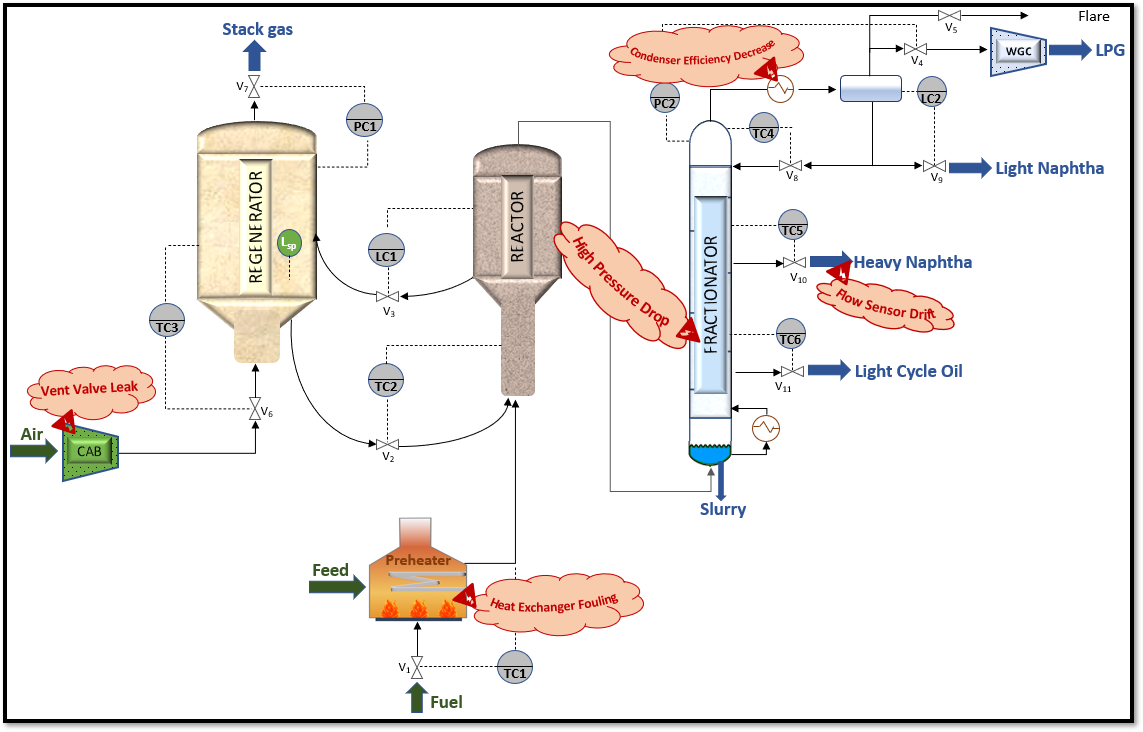

## Data Preprocessing

The dataset contains operational parameters, including temperature, pressure, flow rates, and velocities. The following preprocessing steps were performed:

1. Handling Missing Values: Missing values were filled using mean imputation.
2. Feature Scaling: Standardized using StandardScaler.

## Exploratory Data Analysis (EDA)

EDA was conducted to visualize trends and detect potential anomalies. Key findings:

1. Line plot revealed variations in parameters like Temperature, Pressure, Flowrate, etc.
2. PCA highlighted underlying structure in the dataset.

## Anomaly Detection Techniques

**1. Principal Component Analysis (PCA)**

PCA reduced high-dimensional data to two principal components.<br>
Anomalies were detected by analyzing data points far from the normal cluster.

**2. Autoencoder (Deep Learning)**

A neural network trained to reconstruct normal data patterns.<br>
Reconstruction error was used to flag high-error data points as anomalies.

## **Data Cleaning, Feature Engineering, Predictive Modeling**

Importing libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_excel('columns.xlsx')
col = df['Symbol'].values
col = col.tolist()

In [3]:
df_stableFeedFlow = pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/NOC_stableFeedFlow_outputs.csv',header=None)
df_stableFeedFlow.set_index = df_stableFeedFlow.iloc[:,0]
df_stableFeedFlow = df_stableFeedFlow.drop(columns=0)
df_stableFeedFlow.columns= col
df_stableFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
2141  164.85  79.997  460.82  34.4    -6.4  28  2.6781  1563.6  615.99   
1777  165.17  78.614  460.93  34.4    -6.4  28  2.6840  1564.9  616.00   
875   165.02  79.799  460.66  34.4    -6.4  28  2.6791  1565.7  616.00   
2595  165.10  78.189  460.62  34.4    -6.4  28  2.6808  1566.4  616.00   
1238  165.22  77.345  460.29  34.4    -6.4  28  2.6841  1569.1  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
2141  969.01  ...  1635.2   217.39   2978.9  314.56  509.64  627.94  46.200   
1777  969.01  ...  1650.0   212.13   3021.4  314.34  510.11  628.55  46.630   
875   968.97  ...  1641.4   215.33   2997.2  314.74  509.80  628.14  46.061   
2595  968.98  ...  1645.3   211.07   2982.3  313.39  509.85  628.12  47.687   
1238  969.00  ...  1648.0   211.18   2994.5  313.09  510.02  628.40  48.189   

          V8     V10     V11  
2141  49.422  49.215  46.754  
1777  50.169  49.832  47.557  
875   49.697  49.492  47.094  
2595  49.677  49.167  47.313  
1238  49.933  49.413  47.450  

[5 rows x 46 columns]

In [4]:
df_varyingFeedFlow=pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/NOC_varyingFeedFlow_outputs.csv',header=None)
df_varyingFeedFlow.set_index = df_varyingFeedFlow.iloc[:,0]
df_varyingFeedFlow = df_varyingFeedFlow.drop(columns=0)
df_varyingFeedFlow.columns= col
df_varyingFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
2162  165.90  80.044  461.00  34.4    -6.4  28  2.6932  1569.1  616.01   
2590  164.54  78.226  461.75  34.4    -6.4  28  2.6726  1556.1  616.01   
8639  166.17  75.013  460.49  34.4    -6.4  28  2.6973  1573.8  615.99   
6417  164.04  79.930  461.29  34.4    -6.4  28  2.6682  1555.8  616.01   
9588  165.04  79.501  461.00  34.4    -6.4  28  2.6834  1563.7  615.99   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
2162  968.98  ...  1648.3   210.22   3100.7  316.65  510.68  629.28  44.175   
2590  968.99  ...  1638.2   213.61   2908.8  312.10  509.21  627.18  48.963   
8639  968.95  ...  1653.0   218.68   3118.3  313.98  511.23  630.14  47.901   
6417  969.05  ...  1638.3   212.68   2885.5  312.73  508.83  626.67  47.922   
9588  969.05  ...  1638.8   211.12   2992.5  314.42  509.86  628.05  46.394   

          V8     V10     V11  
2162  51.092  49.450  47.405  
2590  48.667  48.967  46.969  
8639  51.847  50.052  47.623  
6417  48.169  49.015  47.011  
9588  49.674  48.009  46.942  

[5 rows x 46 columns]

In [5]:
df_UAf_decrease = pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/UAf_decrease_outputs.csv',header=None)
df_UAf_decrease.set_index = df_UAf_decrease.iloc[:,0]
df_UAf_decrease = df_UAf_decrease.drop(columns=0)
df_UAf_decrease.columns= col
df_UAf_decrease.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2      Tr  \
948  164.99  79.501  460.71  34.4    -6.4  28  2.6826  1678.9  616.00  969.04   
385  164.85  78.924  460.63  34.4    -6.4  28  2.6780  1588.0  616.00  969.00   
887  164.65  79.705  461.03  34.4    -6.4  28  2.6724  1674.3  616.00  968.95   
696  164.63  80.014  460.81  34.4    -6.4  28  2.6769  1613.9  616.01  969.03   
944  165.04  79.551  460.68  34.4    -6.4  28  2.6831  1679.4  615.99  969.04   

     ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9      V8  \
948  ...  1647.9   207.77   2995.1  314.42  509.86  628.01  46.382  49.717   
385  ...  1639.8   216.51   2966.8  313.62  509.62  627.88  47.285  49.381   
887  ...  1632.7   223.99   2952.5  313.99  509.38  627.72  46.854  49.076   
696  ...  1646.1   217.44   2995.2  314.84  509.73  628.09  45.900  49.646   
944  ...  1646.3   206.67   2993.9  314.41  509.86  627.98  46.371  49.698   

        V10     V11  
948  48.940  47.463  
385  49.306  47.017  
887  49.828  46.632  
696  50.052  47.372  
944  48.797  47.374  

[5 rows x 46 columns]

EDA

In [6]:
df_UAf_decrease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F3           1440 non-null   float64
 1   Tatm         1440 non-null   float64
 2   T1           1440 non-null   float64
 3   P4           1440 non-null   float64
 4   deltaP       1440 non-null   float64
 5   P6           1440 non-null   int64  
 6   Fair         1440 non-null   float64
 7   T3           1440 non-null   float64
 8   T2           1440 non-null   float64
 9   Tr           1440 non-null   float64
 10  Treg         1440 non-null   float64
 11  Lsp          1440 non-null   float64
 12  Tcyc         1440 non-null   float64
 13  Tcyc - Treg  1440 non-null   float64
 14  Cco,sg       1440 non-null   int64  
 15  Co2,sg       1440 non-null   float64
 16  P5           1440 non-null   float64
 17  V4           1440 non-null   float64
 18  V6           1440 non-null   float64
 19  V7    

In [7]:
df_UAf_decrease.describe().T

count          mean           std           min           25%  \
F3           1440.0    164.964931  1.705031e-01    164.480000    164.840000   
Tatm         1440.0     78.342074  1.495206e+00     75.014000     77.206250   
T1           1440.0    460.921306  3.773500e-01    459.880000    460.660000   
P4           1440.0     34.400000  8.884870e-13     34.400000     34.400000   
deltaP       1440.0     -6.400000  1.732550e-13     -6.400000     -6.400000   
P6           1440.0     28.000000  0.000000e+00     28.000000     28.000000   
Fair         1440.0      2.679885  3.071059e-03      2.671800      2.677700   
T3           1440.0   1631.535556  4.738479e+01   1558.900000   1584.475000   
T2           1440.0    615.999743  7.034361e-03    615.960000    616.000000   
Tr           1440.0    968.999750  3.104291e-02    968.910000    968.980000   
Treg         1440.0   1250.001528  5.095774e-02   1249.900000   1250.000000   
Lsp          1440.0     29.653148  9.402505e-02     29.376000     29.586000   
Tcyc         1440.0   1255.279028  5.020209e-02   1255.200000   1255.200000   
Tcyc - Treg  1440.0      5.278568  3.786855e-02      5.187000      5.250200   
Cco,sg       1440.0  29881.456250  4.867664e+01  29737.000000  29846.000000   
Co2,sg       1440.0      0.012471  1.692165e-04      0.012067      0.012344   
P5           1440.0     24.900000  6.752501e-13     24.900000     24.900000   
V4           1440.0     46.218401  3.991914e-01     45.335000     45.914250   
V6           1440.0     24.783983  1.008298e-01     24.532000     24.708000   
V7           1440.0     54.577811  6.263034e-02     54.413000     54.534000   
V3           1440.0     46.982208  1.595724e-02     46.937000     46.971000   
V1           1440.0     58.694293  5.779836e-01     57.569000     58.161750   
V2           1440.0     45.315695  5.303164e-02     45.177000     45.283000   
Frgc         1440.0  49572.277083  6.081520e+01  49407.000000  49529.000000   
Fsc          1440.0  49572.236806  6.126673e+01  49411.000000  49529.000000   
ACAB         1440.0    280.687549  1.405517e+00    277.550000    279.710000   
AWGC         1440.0    204.330486  2.734571e+00    198.270000    202.257500   
F5           1440.0   2016.612847  1.985887e+01   1977.900000   1998.300000   
F7           1440.0   3735.767917  5.533354e+00   3722.500000   3731.800000   
Fsg          1440.0    160.793132  1.845920e-01    160.310000    160.660000   
FV11         1440.0  28081.818750  3.012223e+02  27411.000000  27854.250000   
P1           1440.0     14.637990  1.015644e-04     14.637000     14.638000   
P2           1440.0     35.044535  2.357686e-02     34.995000     35.026000   
FLPG         1440.0   3032.567014  4.823743e+01   2926.000000   2995.775000   
FLN          1440.0   3921.324236  4.809104e+01   3852.500000   3878.700000   
FHN          1440.0    708.488417  4.016996e+00    696.510000    705.877500   
FLCO         1440.0   1642.707361  4.562635e+00   1630.400000   1639.400000   
FSlurry      1440.0    214.301500  4.559457e+00    201.700000    210.787500   
FReflux      1440.0   2977.411250  2.315561e+01   2923.500000   2960.100000   
Tfra         1440.0    313.424194  1.300492e+00    310.550000    312.430000   
T10          1440.0    509.775236  1.368354e-01    509.380000    509.680000   
T20          1440.0    628.078847  1.482783e-01    627.680000    627.990000   
V9           1440.0     47.635750  1.609722e+00     45.383000     46.211750   
V8           1440.0     49.591987  2.162617e-01     49.074000     49.419000   
V10          1440.0     49.332665  5.618536e-01     47.652000     48.962000   
V11          1440.0     47.171890  2.516454e-01     46.498000     46.986000   

                      50%           75%           max  
F3             164.970000    165.080000    165.520000  
Tatm            78.782000     79.699250     80.057000  
T1             460.910000    461.190000    461.930000  
P4              34.400000     34.400000     34.400000  
deltaP          -6.4

<AxesSubplot:>

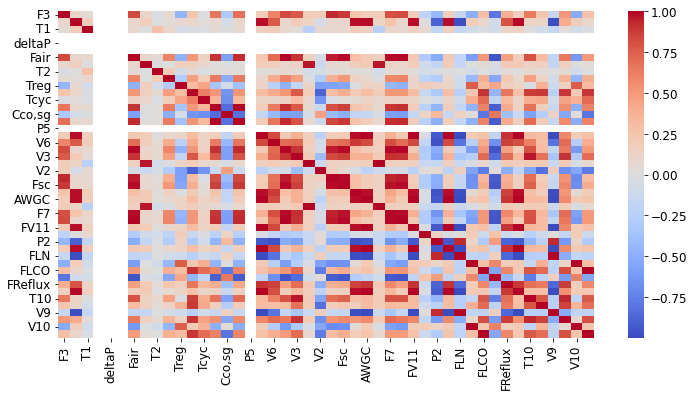

In [8]:
sns.heatmap(df_UAf_decrease.corr(),cmap='coolwarm')

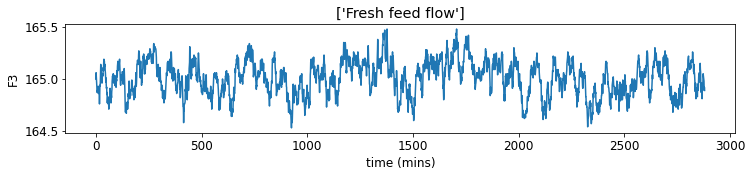

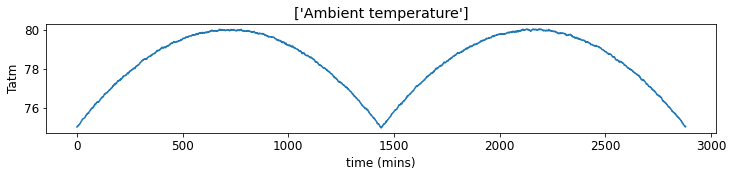

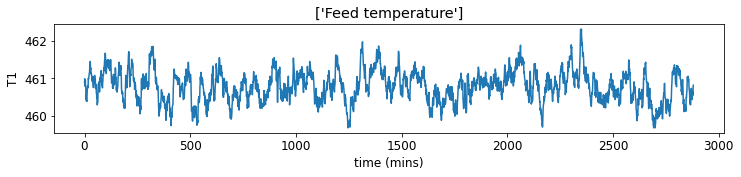

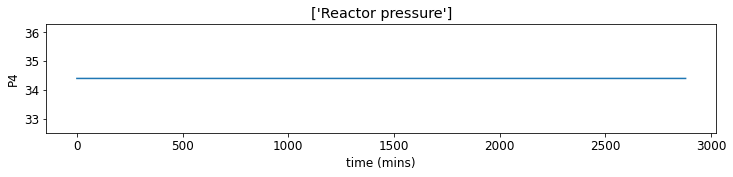

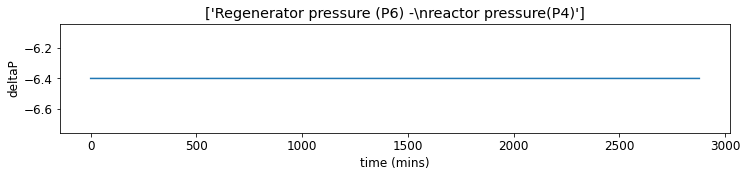

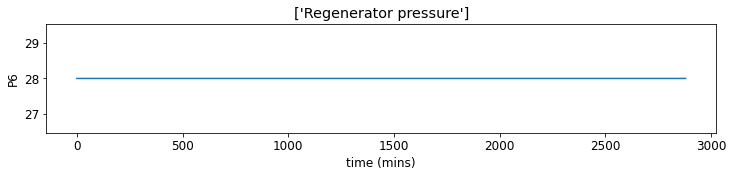

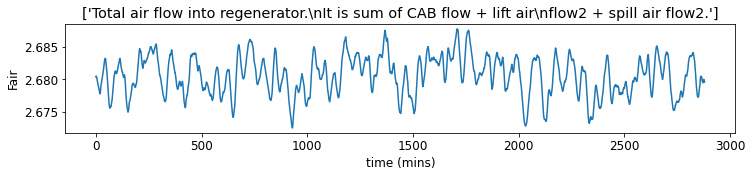

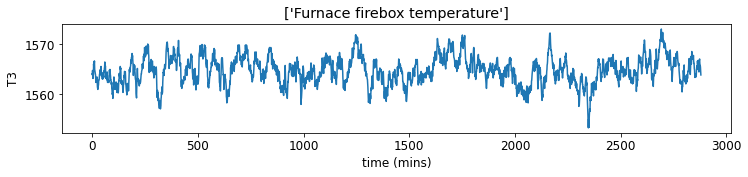

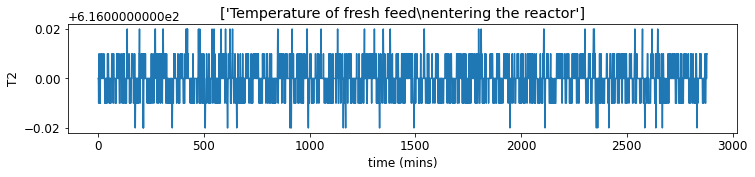

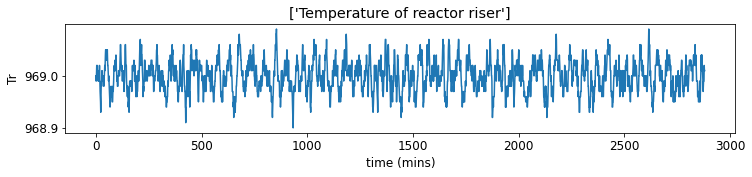

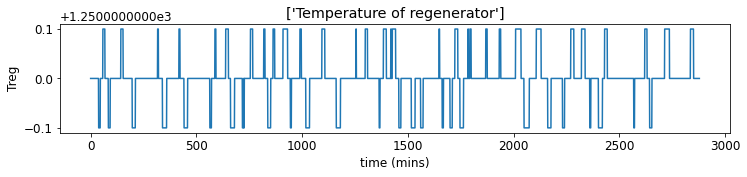

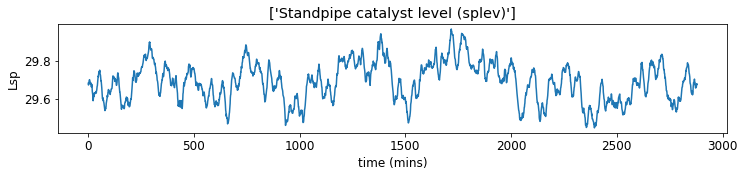

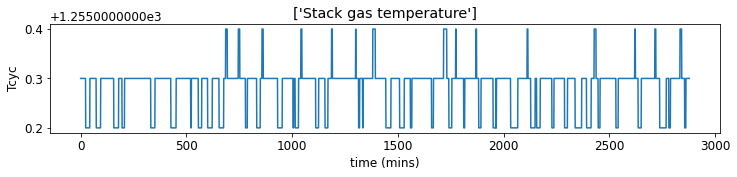

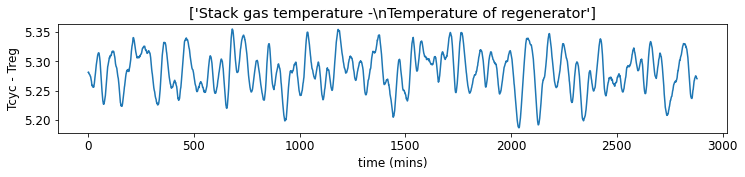

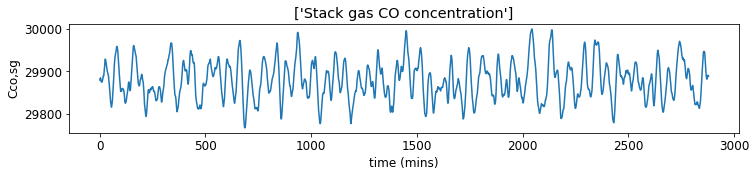

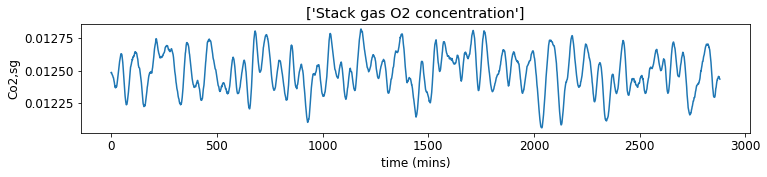

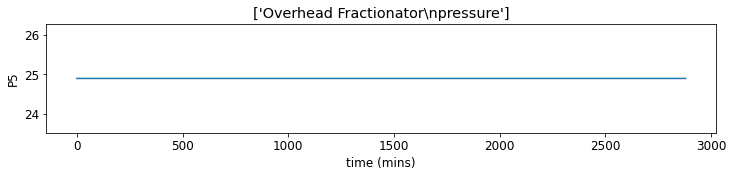

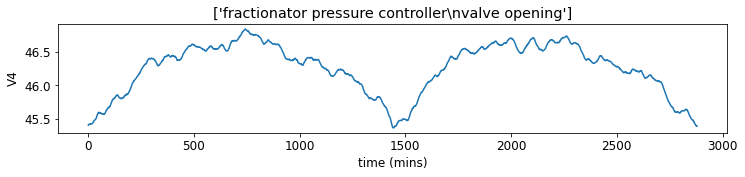

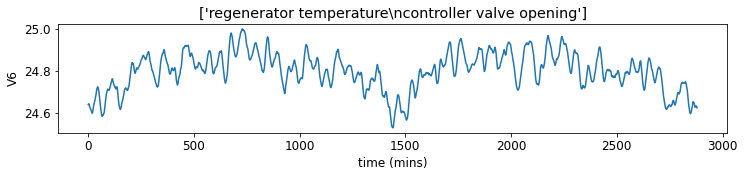

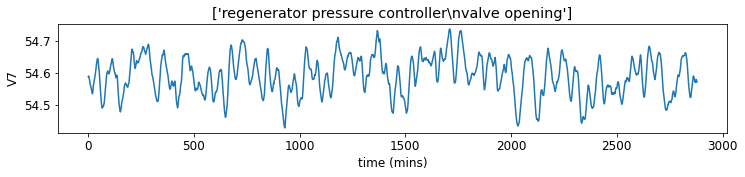

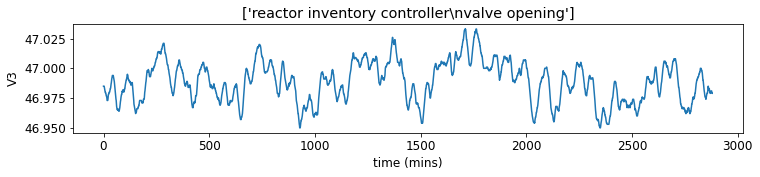

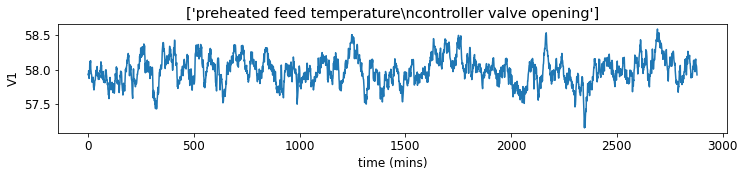

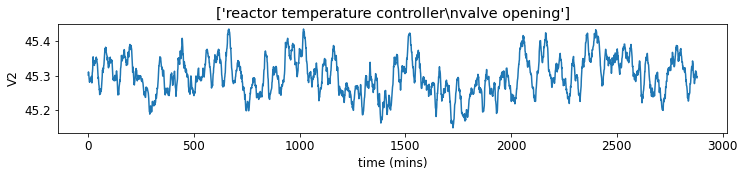

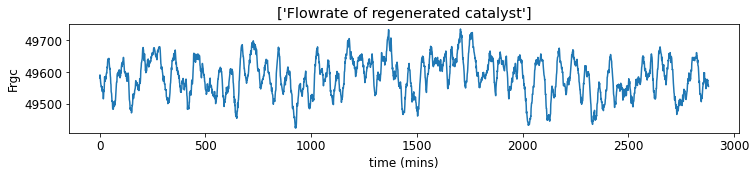

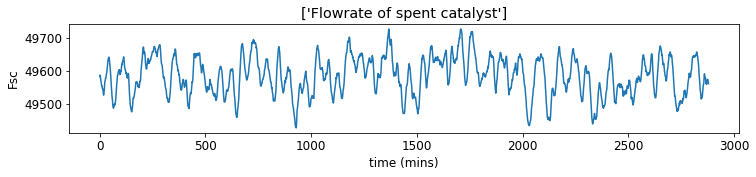

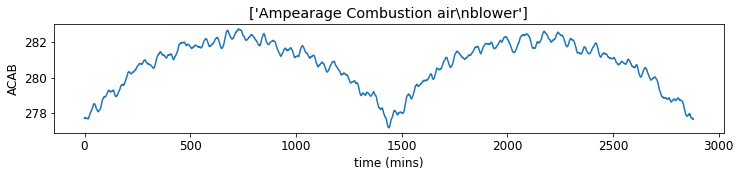

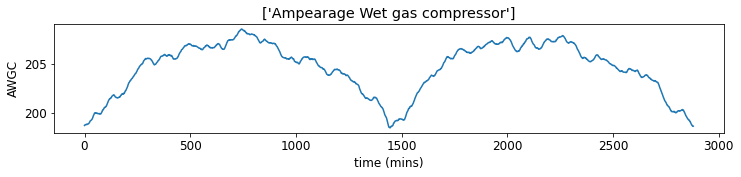

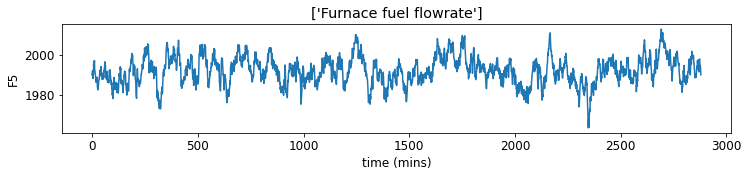

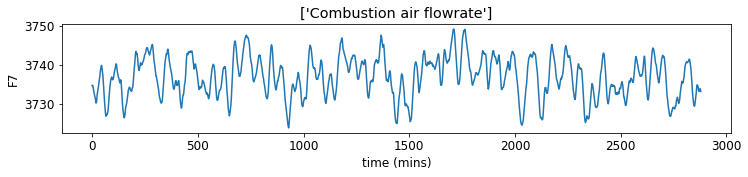

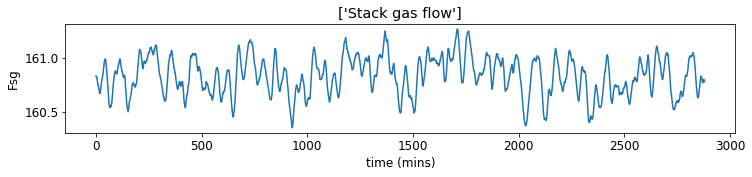

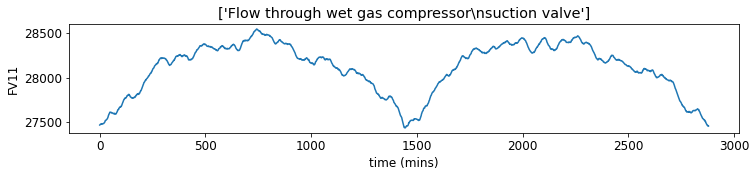

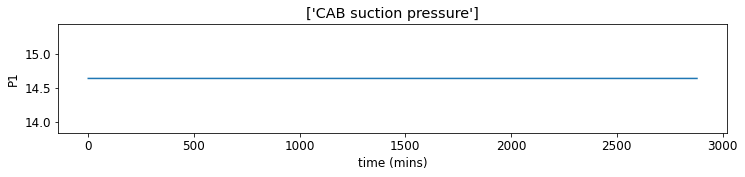

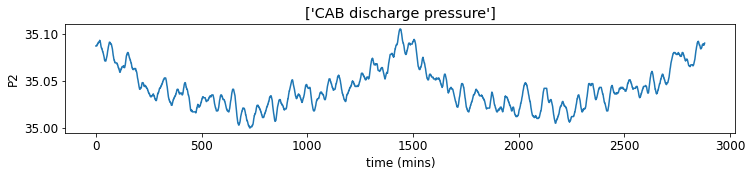

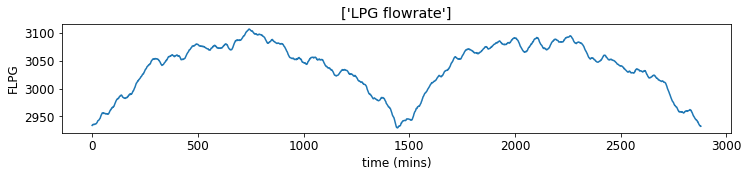

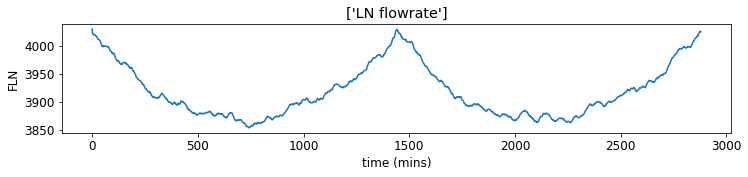

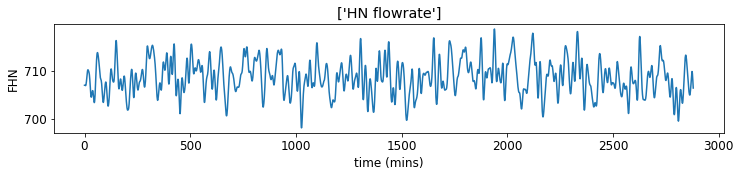

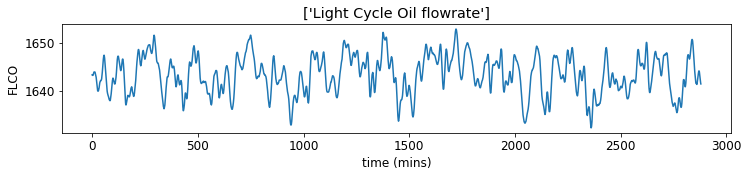

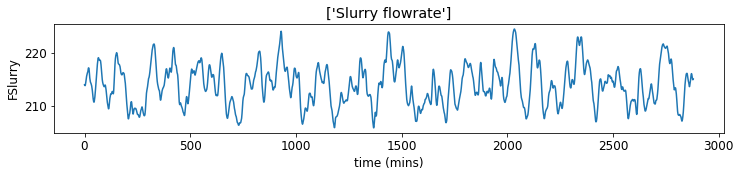

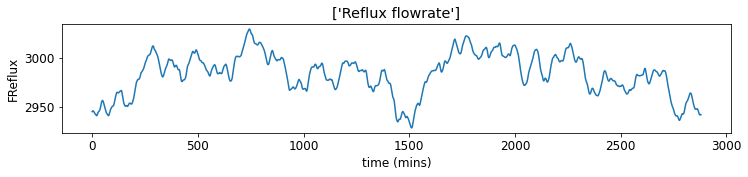

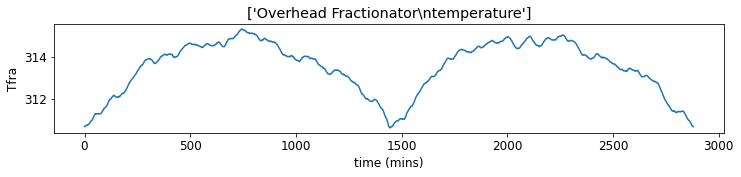

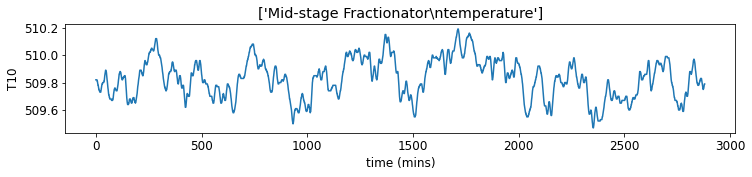

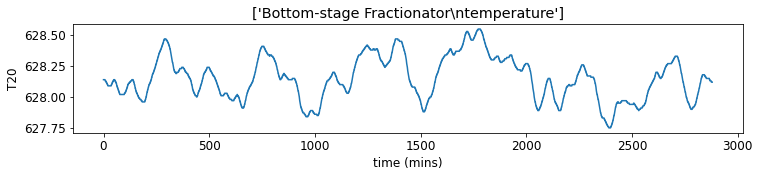

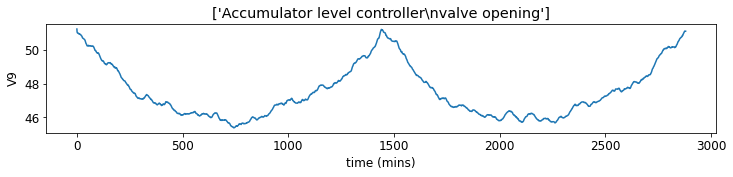

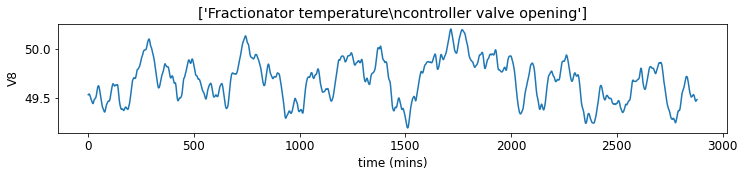

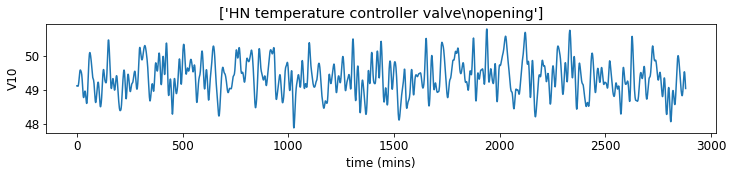

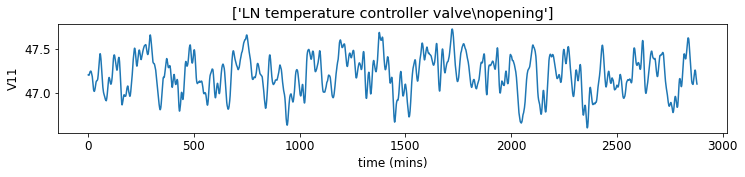

In [9]:
for n,i in enumerate(df_stableFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_stableFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

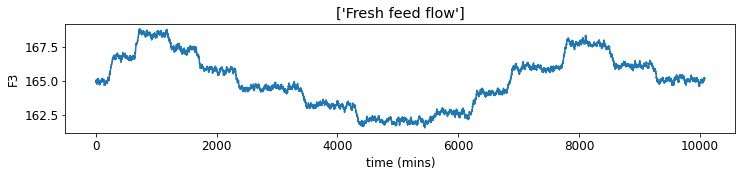

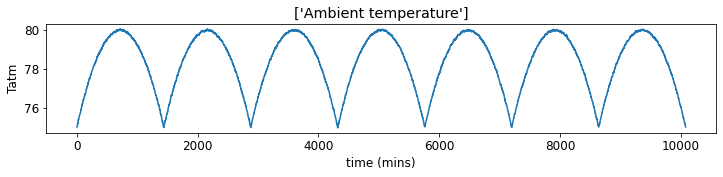

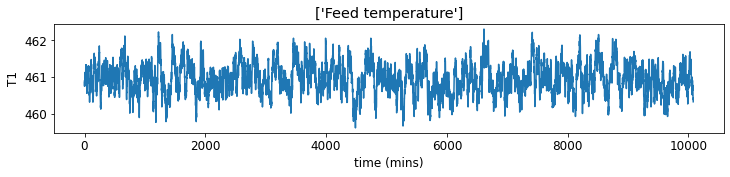

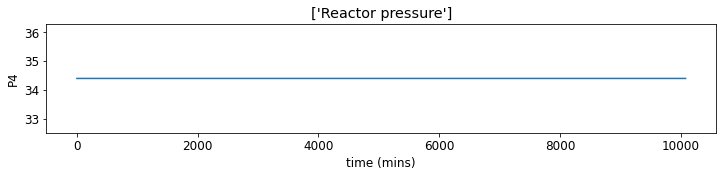

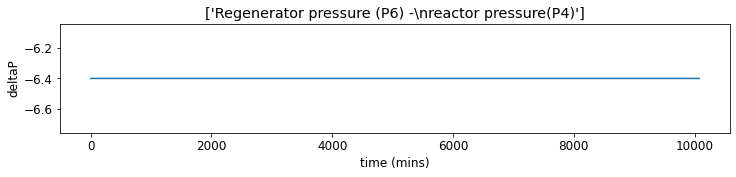

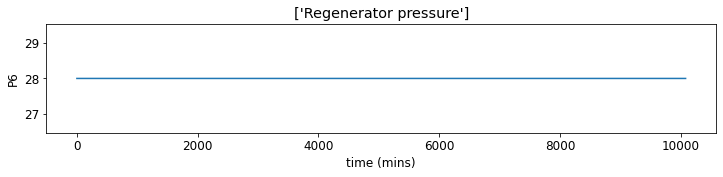

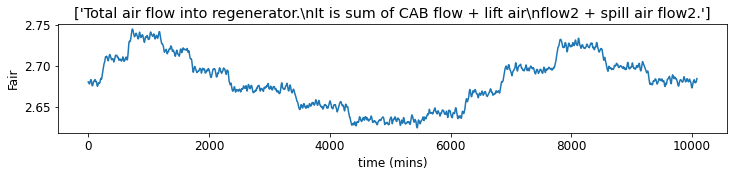

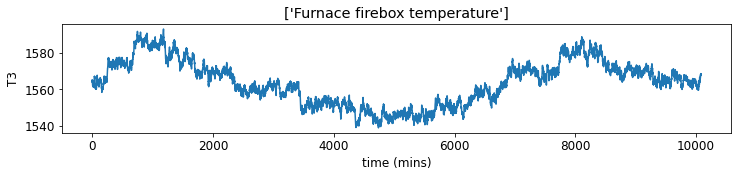

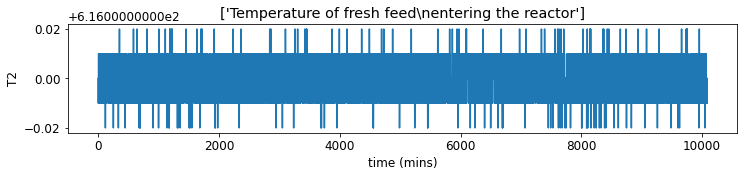

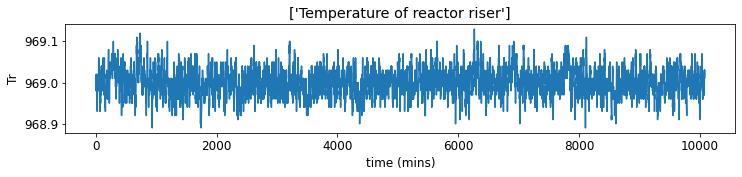

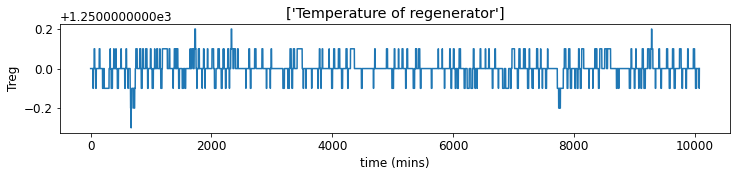

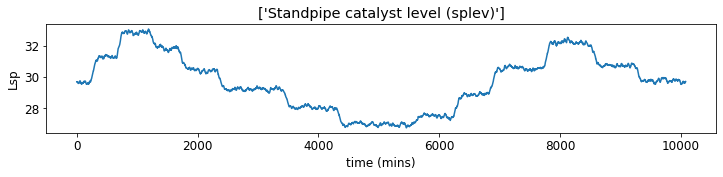

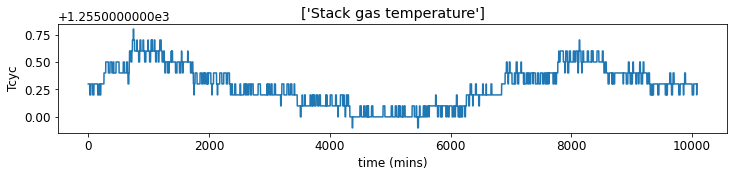

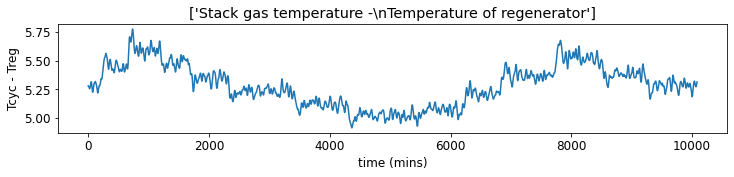

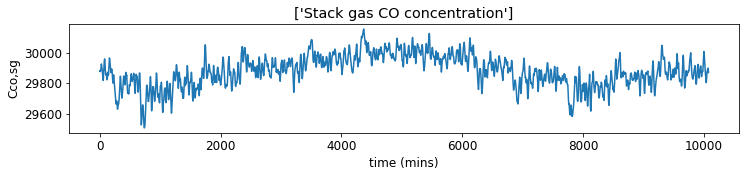

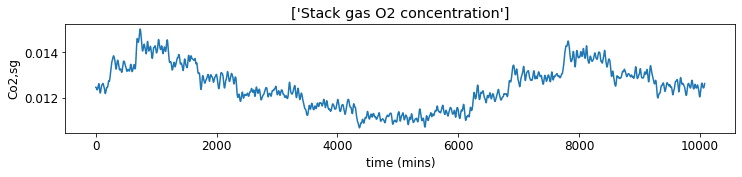

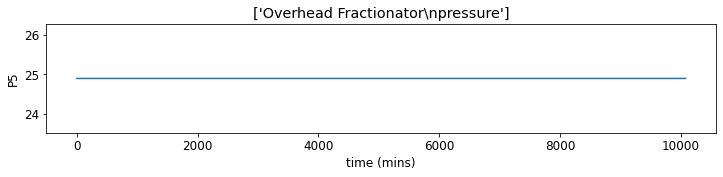

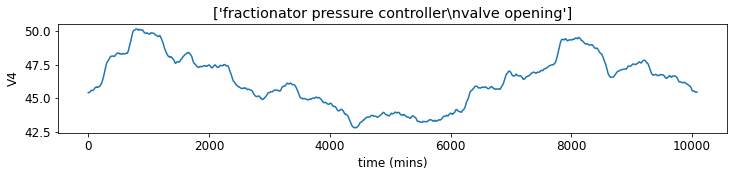

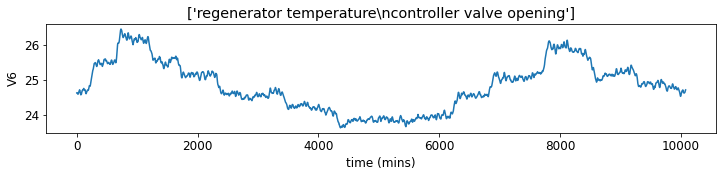

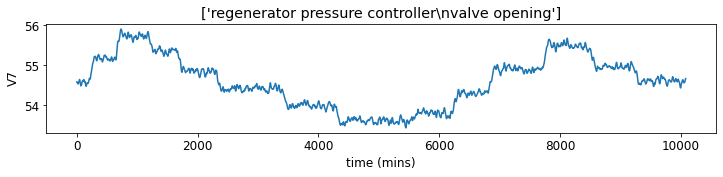

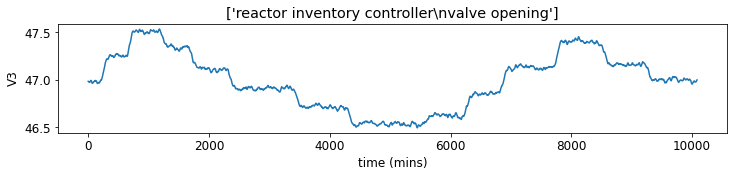

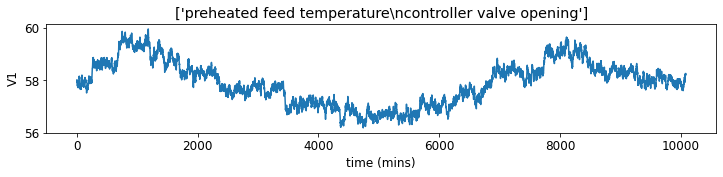

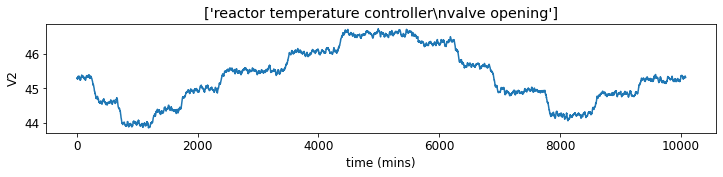

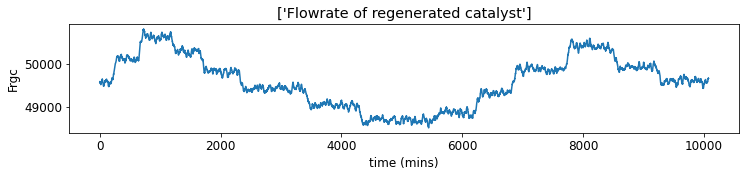

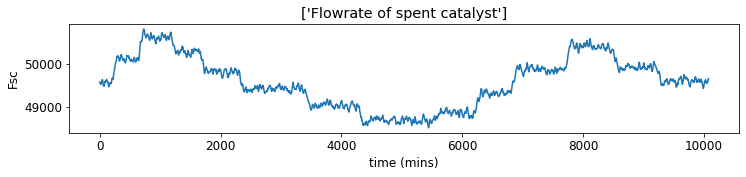

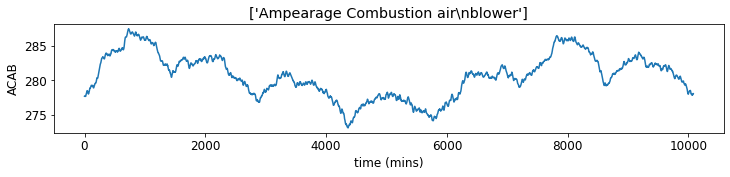

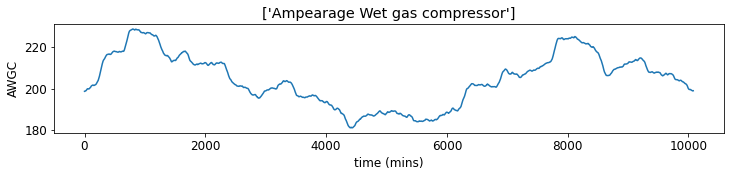

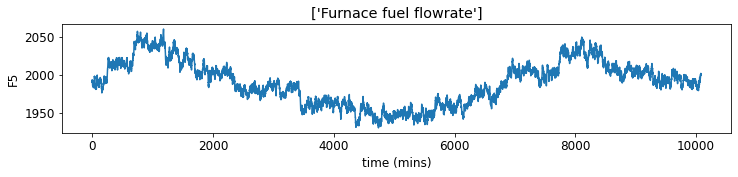

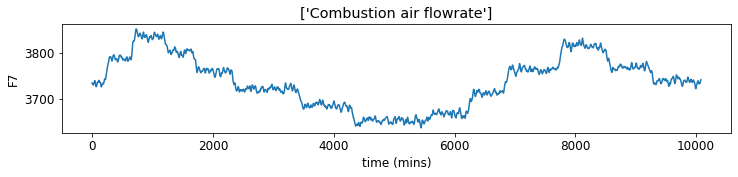

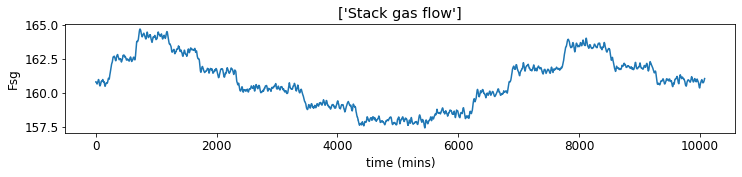

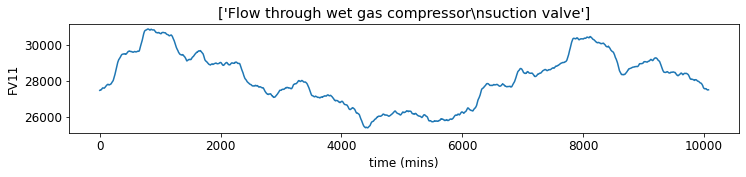

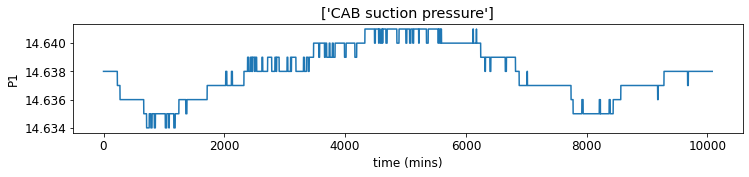

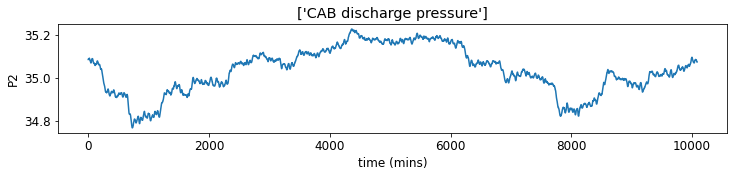

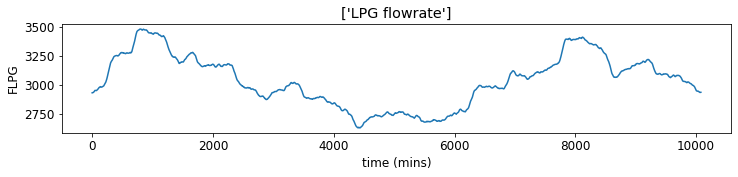

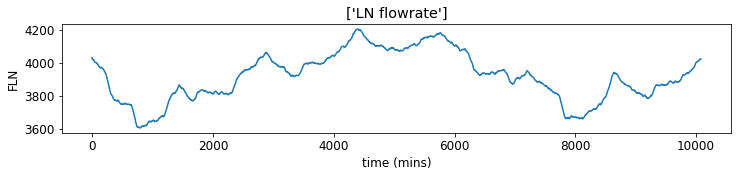

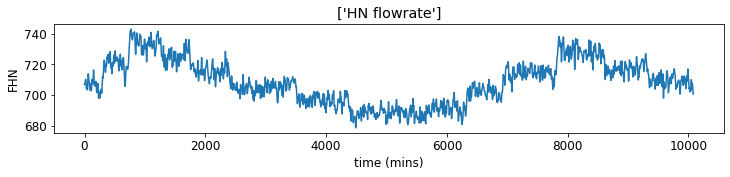

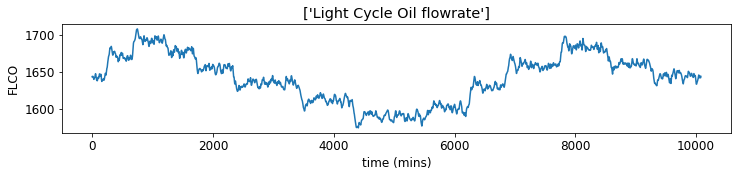

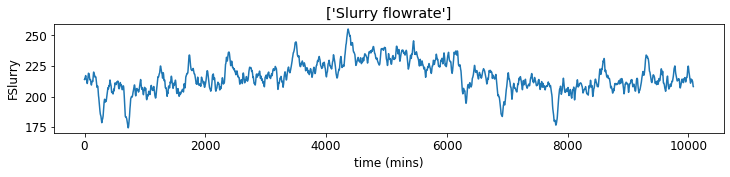

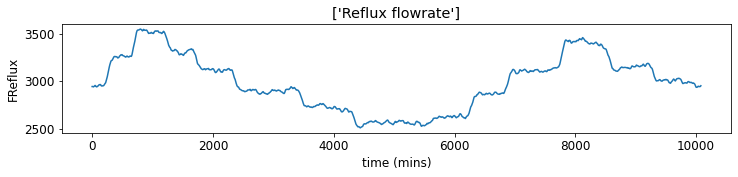

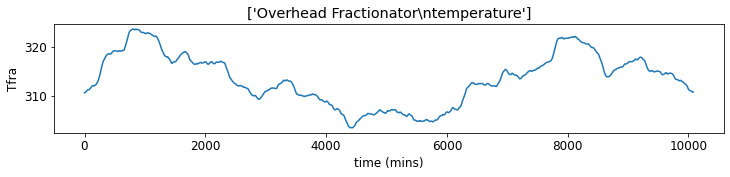

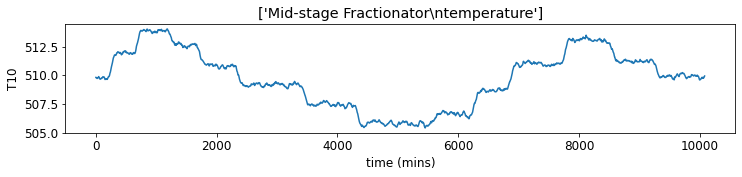

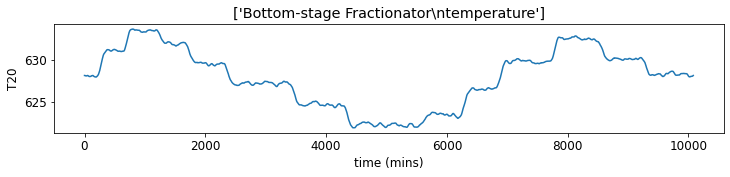

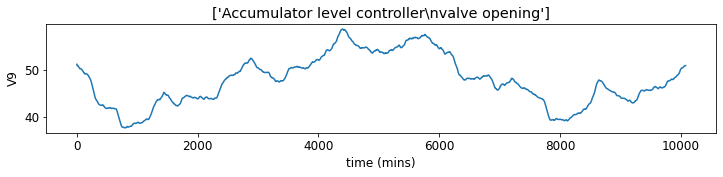

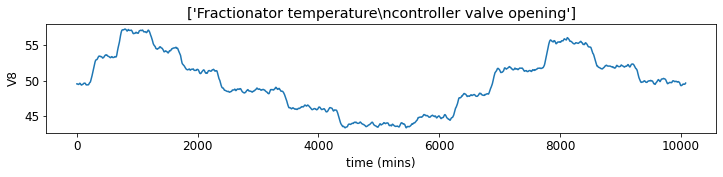

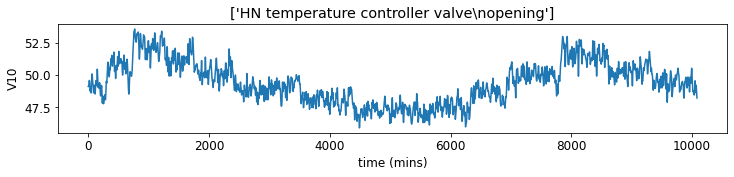

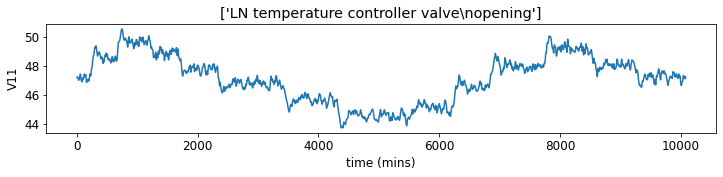

In [10]:
for n,i in enumerate(df_varyingFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_varyingFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

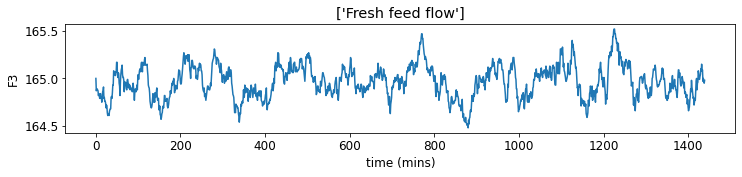

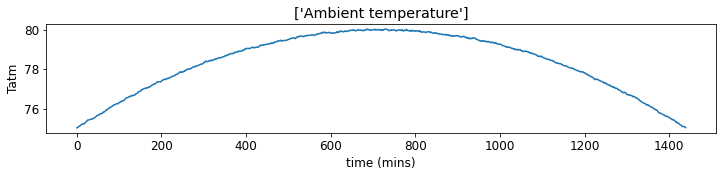

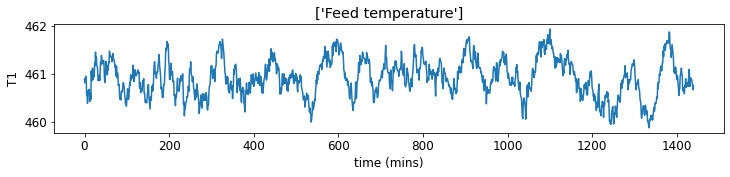

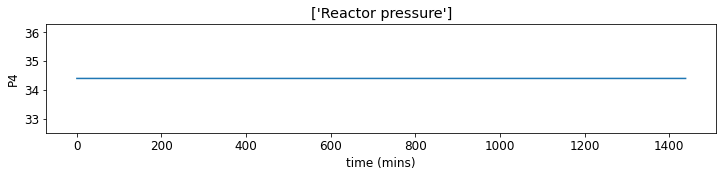

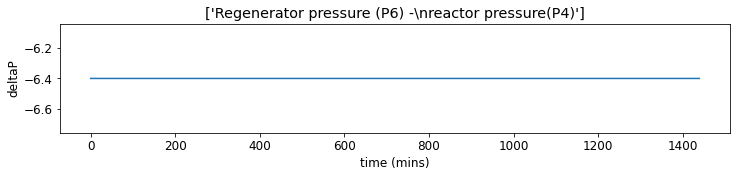

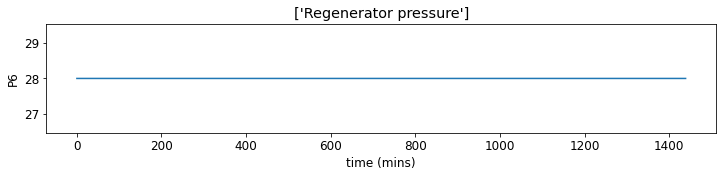

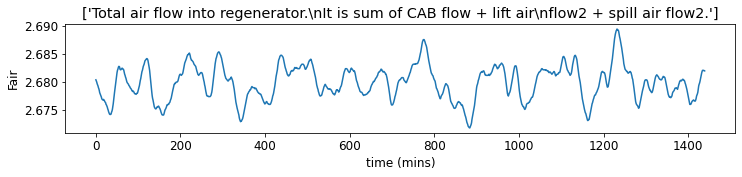

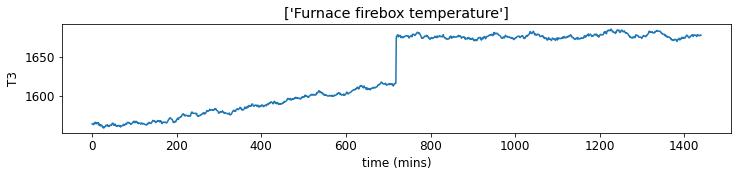

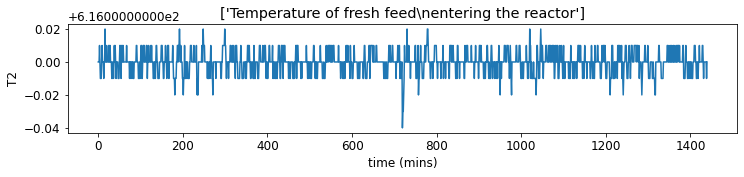

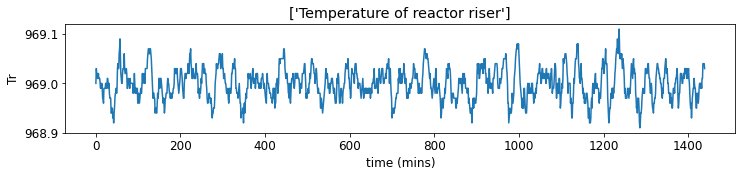

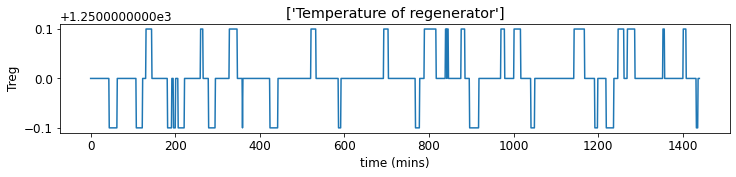

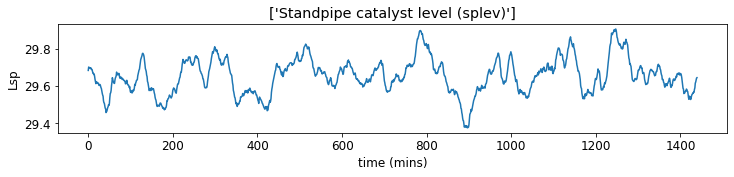

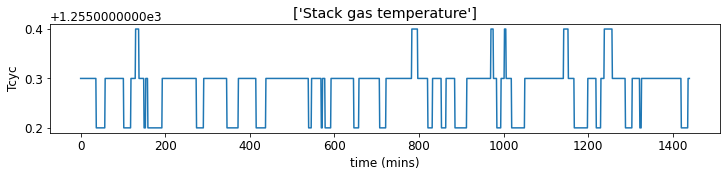

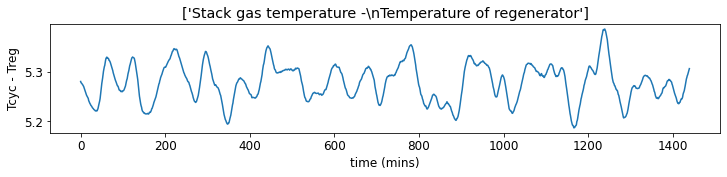

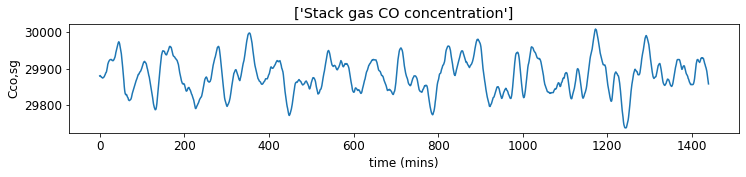

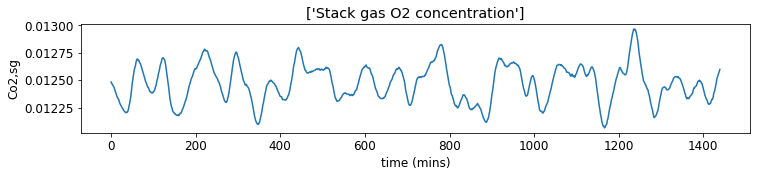

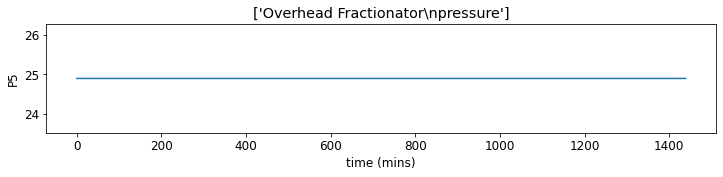

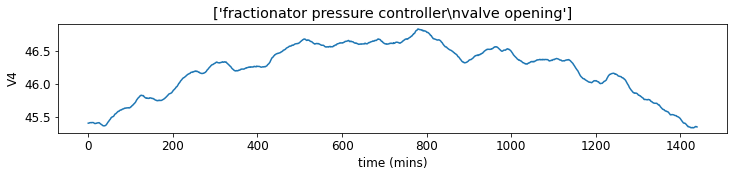

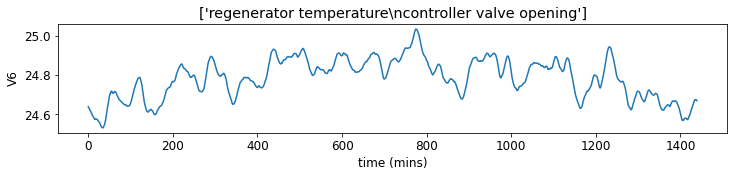

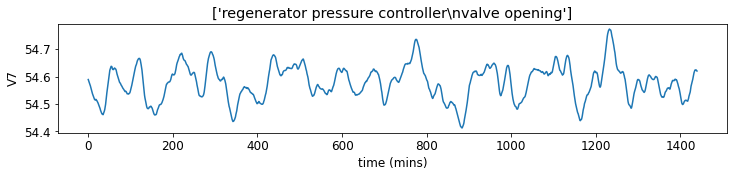

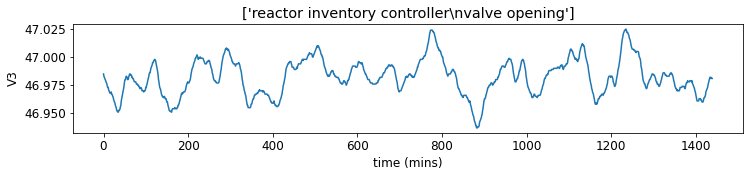

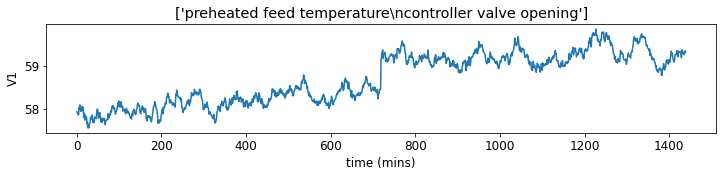

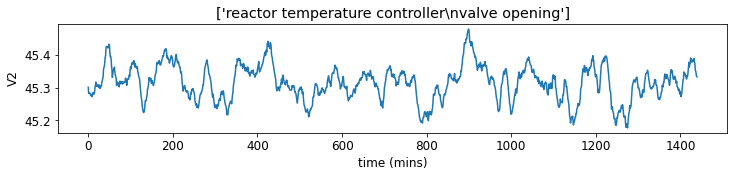

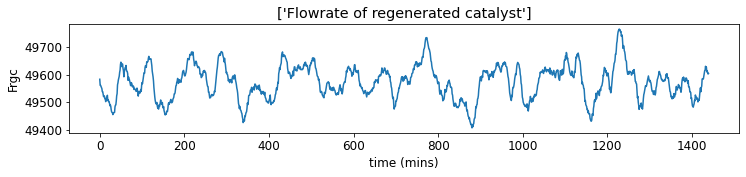

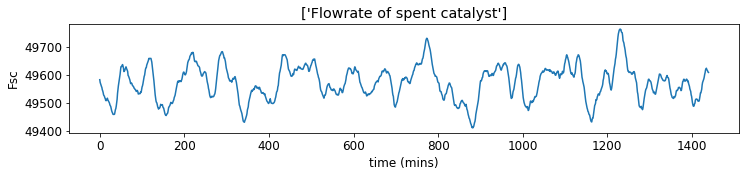

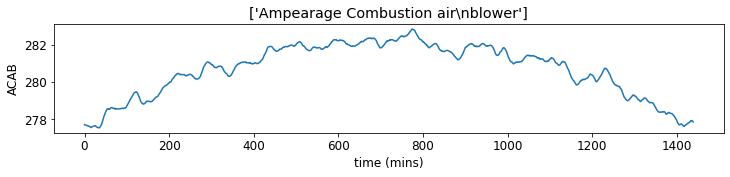

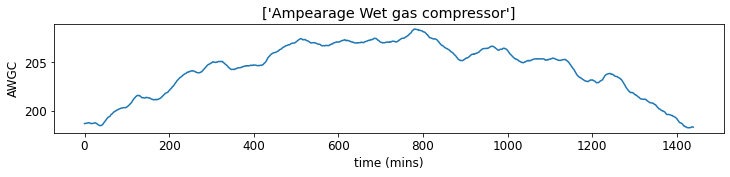

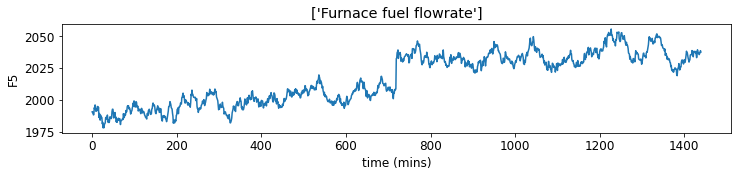

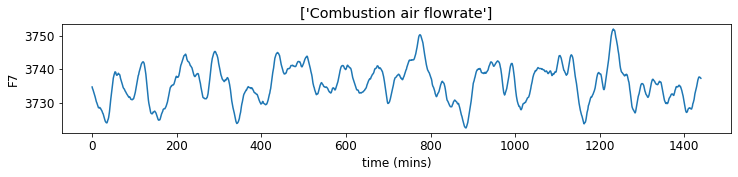

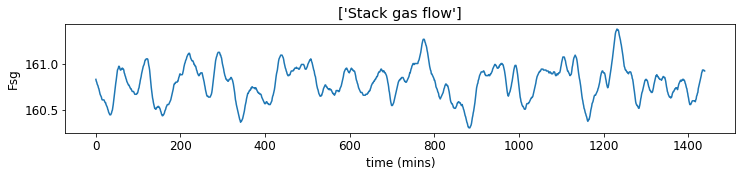

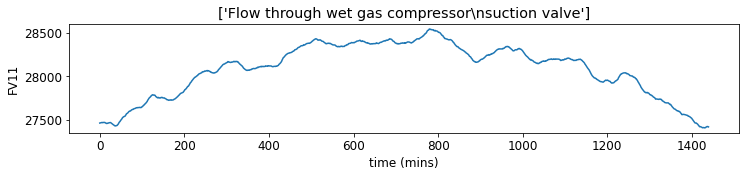

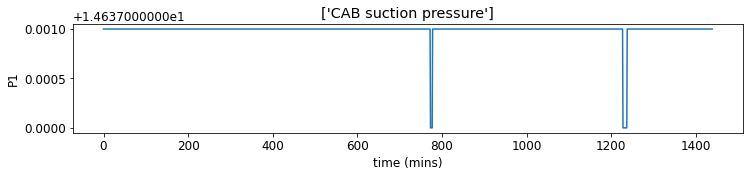

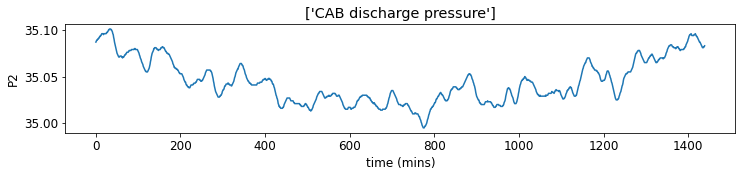

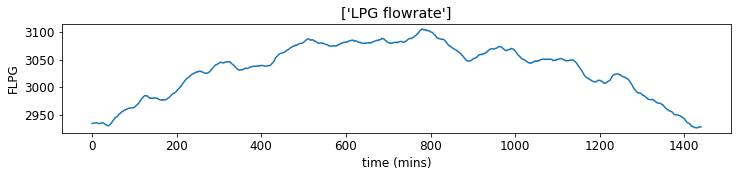

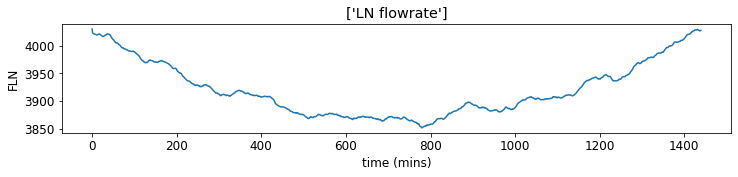

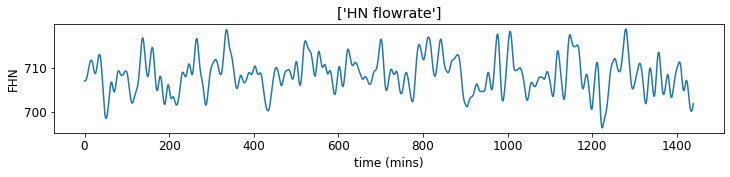

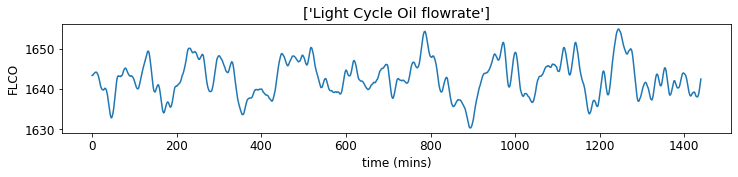

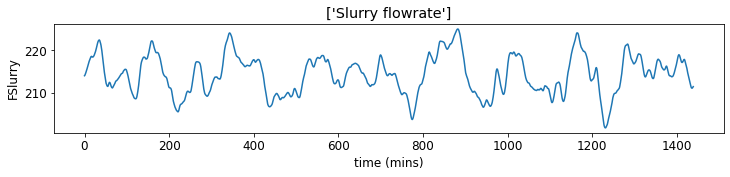

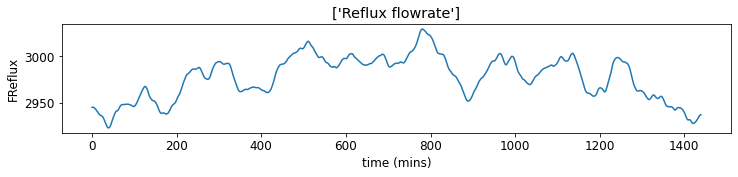

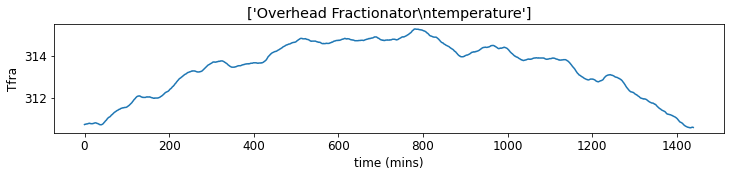

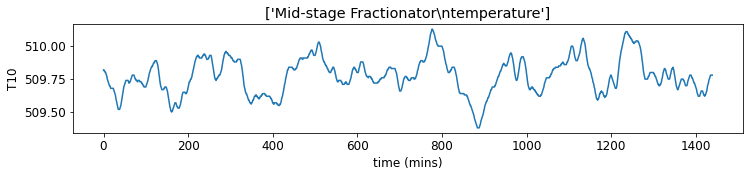

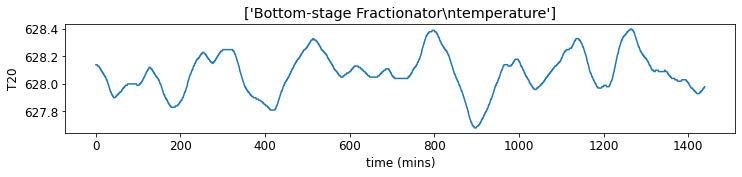

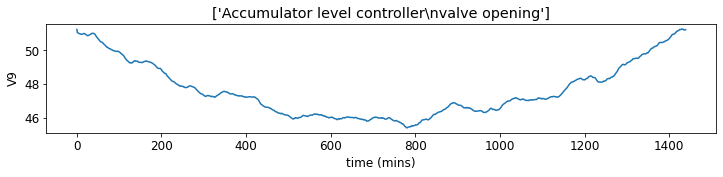

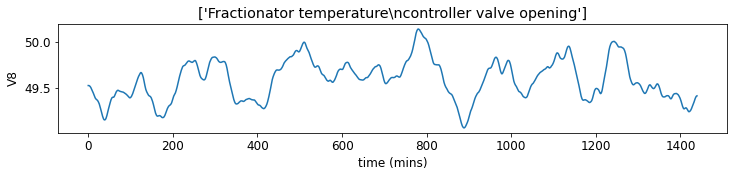

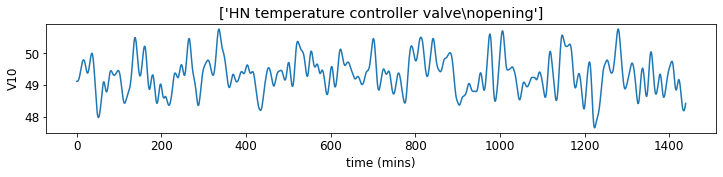

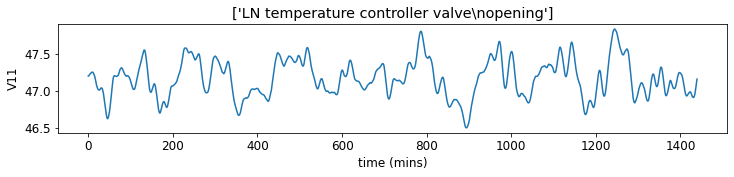

In [11]:
for n,i in enumerate(df_UAf_decrease.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_UAf_decrease[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

**Scaling the data with mean=0 & std = 1 using Standard Scalar.**

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [13]:
X = ss.fit_transform(df_stableFeedFlow)

**Applying PCA**

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

In [15]:
X_pca = pca.fit_transform(X)

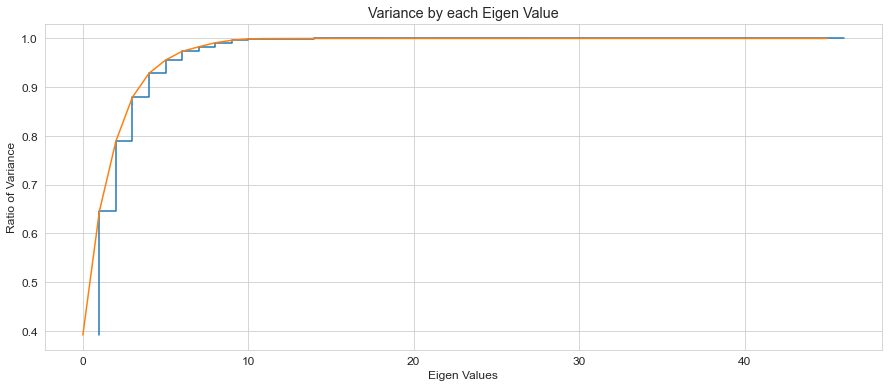

In [16]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,47)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,46)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

It can be clearly seen than 10 dimentions can describe more than 98% data, hence redcing the feature space from 46 to 10.

In [17]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

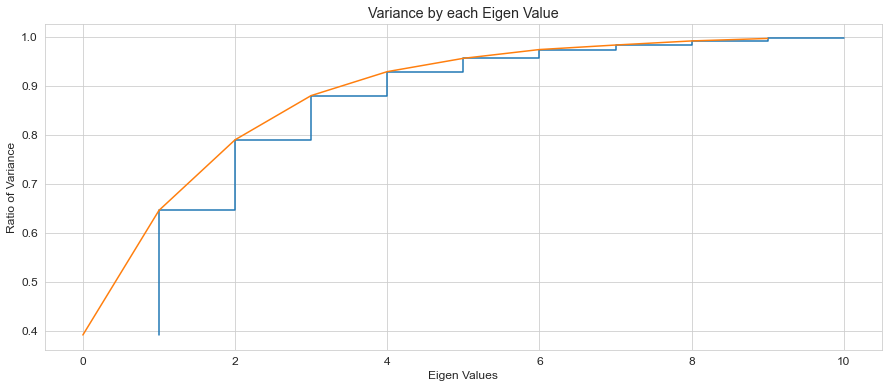

In [18]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,11)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,10)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

**Applying Autoencoders**

In [19]:
X_train = X.reshape(2880,46,1)

Lets create a Sequential model with Bidirectional LSTM & train the model when plant is in steady state.<br>
To avoid overfitting of model by using 20% dropout.

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True),input_shape=(46,1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 46, 512)           528384    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 46, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 46, 256)           656384    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 46, 256)           0         
                                                                 
 dense (Dense)               (None, 46, 1)             257       
                                                                 
Total params: 1185025 (4.52 MB)
Trainable params: 118502

In [21]:
model.fit(X_train,X_train,epochs=30)

Epoch 1/30
90/90 [==============================] - 90s 430ms/step - loss: 0.1571 - mae: 0.2174
Epoch 2/30
90/90 [==============================] - 39s 439ms/step - loss: 0.0030 - mae: 0.0381
Epoch 3/30
90/90 [==============================] - 39s 434ms/step - loss: 0.0025 - mae: 0.0342
Epoch 4/30
90/90 [==============================] - 39s 435ms/step - loss: 0.0023 - mae: 0.0321
Epoch 5/30
90/90 [==============================] - 40s 444ms/step - loss: 0.0021 - mae: 0.0305
Epoch 6/30
90/90 [==============================] - 39s 437ms/step - loss: 0.0019 - mae: 0.0292
Epoch 7/30
90/90 [==============================] - 39s 433ms/step - loss: 0.0019 - mae: 0.0285
Epoch 8/30
90/90 [==============================] - 40s 441ms/step - loss: 0.0018 - mae: 0.0278
Epoch 9/30
90/90 [==============================] - 40s 440ms/step - loss: 0.0017 - mae: 0.0275
Epoch 10/30
90/90 [==============================] - 40s 441ms/step - loss: 0.0017 - mae: 0.0268
Epoch 11/30
90/90 [====================

**Calculating the Reconstruction error using MAE.**<br>
Considering 99 percentile of error as an acceptable range, and it signifies the steady state operation.

In [22]:
error_ae = []
for i in range(X.shape[0]):
    y_pred = model.predict(X[i].reshape(1,46,1),verbose=None)[0,:,0]
    error_ae.append(np.abs(X[i]-y_pred).sum())
AE_CL = np.percentile(error_ae,99)

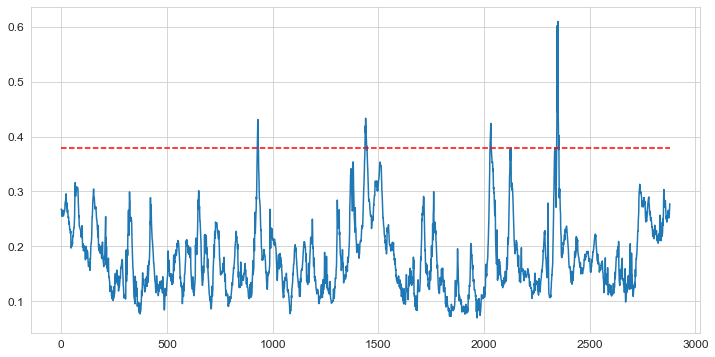

In [23]:
pd.Series(error_ae).plot()
plt.hlines(AE_CL,0,len(error_ae),colors='red',linestyles='--')

**Calculating the Reconstruction error using Q-test, T22-test & Cosine similarity.**<br>
Considering 99 percentile of error as an acceptable range, and it signifies the steady state operation.

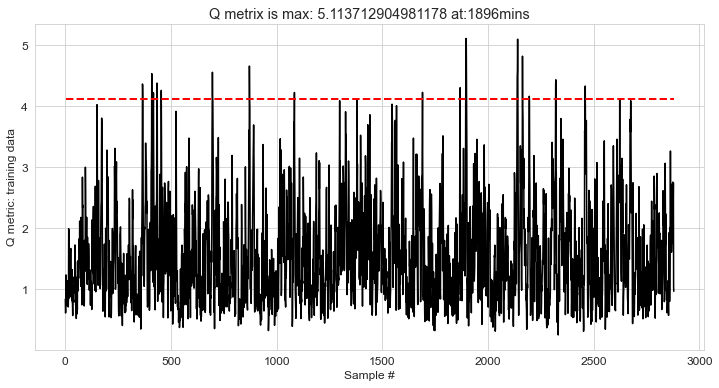

In [24]:
X_reconstructed = np.dot(X_pca,pca.components_)
error_pca = X-X_reconstructed
Q_train = np.sum(np.abs(error_pca),axis=1)
Q_CL = np.percentile(Q_train,99)
# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
plt.show()

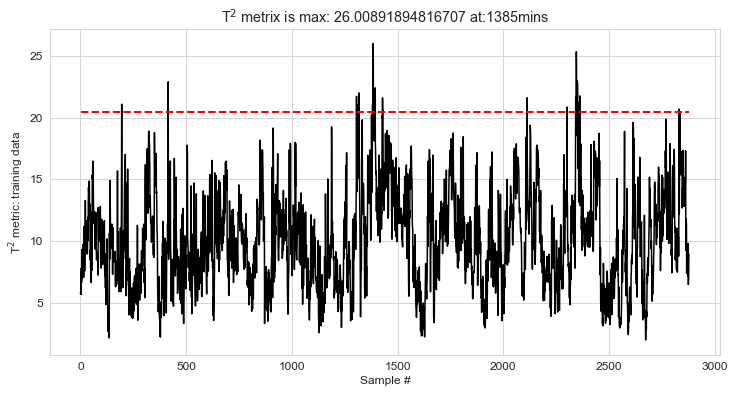

In [25]:
lambda_ = np.diag(pca.explained_variance_)
lambda_inv = np.linalg.inv(lambda_)
T_train = np.zeros(X_pca.shape[0])
for i in range(X_pca.shape[0]):
    T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
T_CL = np.percentile(T_train,99)
# T2_train plot with CL
plt.figure()
plt.plot(T_train, color='black')
plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('T$^2$ metric: training data')
plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
plt.show()

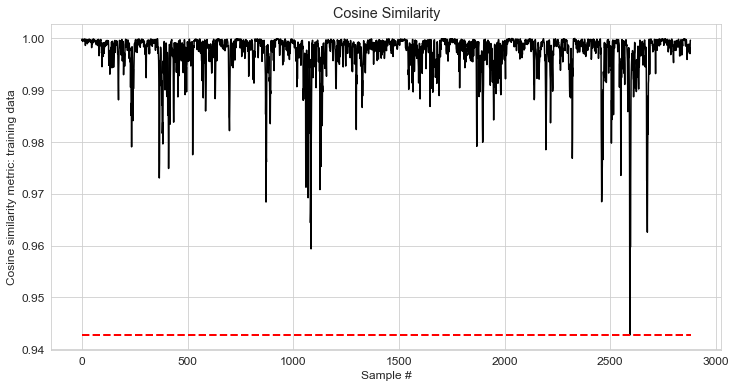

In [26]:
cosine = []
ed = []
for i in range(X.shape[0]):
    v1 = X[i]
    v2 = np.dot(X_pca,pca.components_)[i]
    cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    ed.append(np.linalg.norm(v1 - v2))
C_CL = np.min(cosine)
E_CL = np.percentile(ed,99)
# pd.Series(ed).plot(color='black')
# plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
# plt.show()
pd.Series(cosine).plot(color='black')
plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Cosine similarity metric: training data')
plt.title(f'Cosine Similarity')
plt.show()

In [27]:
Q_CL,T_CL,C_CL,E_CL,AE_CL

(4.1231132155190835,
 20.4243503525688,
 0.9427550112367161,
 0.9281694746755801,
 0.37931151220578185)

Let's create a function for test data preprocessing and testing the data with our model.

In [28]:
def Q_test(X,X_pca,pca_components_,Q_CL):
    X_reconstructed = np.dot(X_pca,pca_components_)
    error_pca = X-X_reconstructed
    Q_train = np.sum(np.abs(error_pca),axis=1)
    # Q_train plot with CL
    plt.figure()
    plt.plot(Q_train, color='black')
    plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Q metric: training data')
    plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
    plt.show()
    return error_pca

In [29]:
def T_test(X_pca,explained_variance_,TCL):
    lambda_ = np.diag(pca.explained_variance_)
    lambda_inv = np.linalg.inv(lambda_)
    T_train = np.zeros(X_pca.shape[0])
    for i in range(X_pca.shape[0]):
        T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
    # T2_train plot with CL
    plt.figure()
    plt.plot(T_train, color='black')
    plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('T$^2$ metric: training data')
    plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
    plt.show()

In [30]:
def cosine(X,X_transformed,pca_components_,C_CL,E_CL):
    cosine = []
    ed = []
    for i in range(X.shape[0]):
        v1 = X[i]
        v2 = np.dot(X_transformed,pca_components_)[i]
        cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
        ed.append(np.linalg.norm(v1 - v2))
#     pd.Series(ed).plot(color='black')
#     plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
#     plt.xlabel('Sample #')
#     plt.ylabel('Eucledian Distance metric: training data')
#     plt.show()
    pd.Series(cosine).plot(color='black')
    plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Cosine similarity metric: training data')
    plt.title(f'Cosine Similarity')
    plt.show()

In [31]:
def autoencoder(df_test,CL):
    X_test = ss.transform(df_test)
    error_ae = []
    error_sum = []
    for i in range(X_test.shape[0]):
        y_pred = model.predict(X_test[i].reshape(1,46,1),verbose=None)[0,:,0]
        error_ae.append(np.abs(X_test[i]-y_pred))
        error_sum.append(np.abs(X_test[i]-y_pred).sum())
    error_ae=np.array(error_ae)
    pd.Series(error_sum).plot(color = 'black')
    plt.hlines(CL,0,len(error_ae),colors='red',linestyles='--')
    plt.xlabel('Sample #')
    plt.ylabel('Reconstruction error by Autoencoder')
    return error_ae

## **Testing the model on Varying feed flow rate.**

In [32]:
X = ss.transform(df_varyingFeedFlow)
X_test = pca.transform(X)

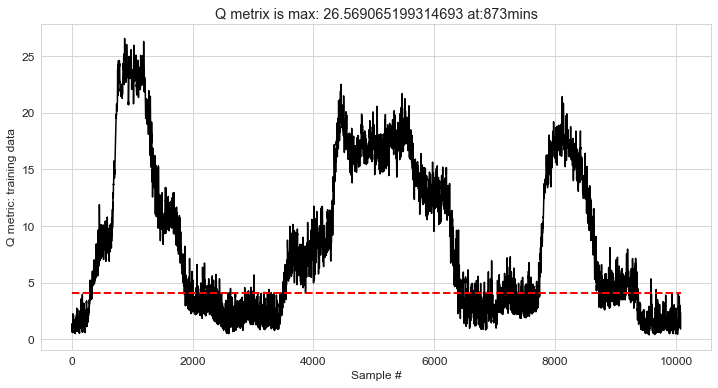

In [33]:
error_pca = Q_test(X,X_test,pca.components_,Q_CL)

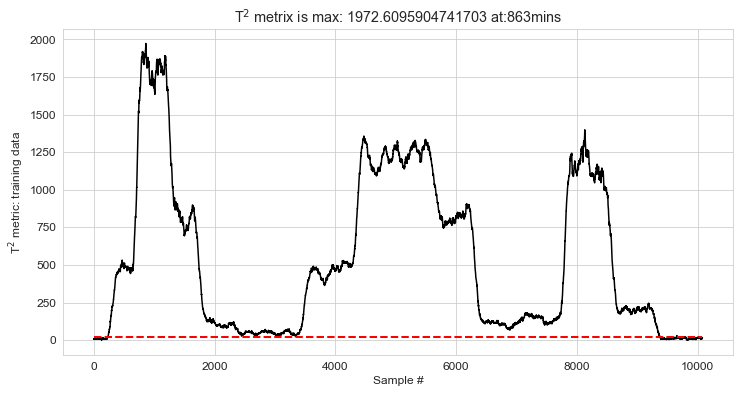

In [34]:
T_test(X_test,pca.explained_variance_,T_CL)

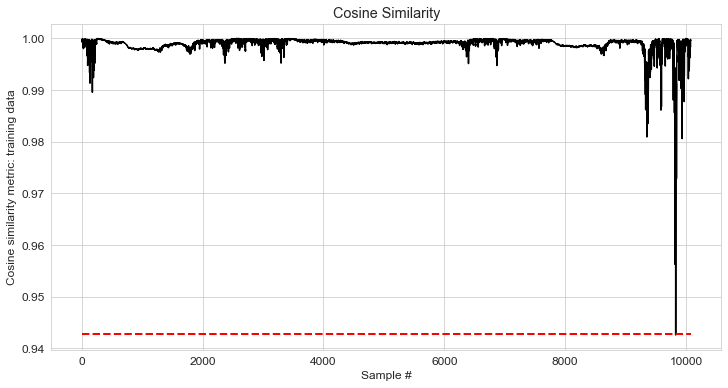

In [35]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

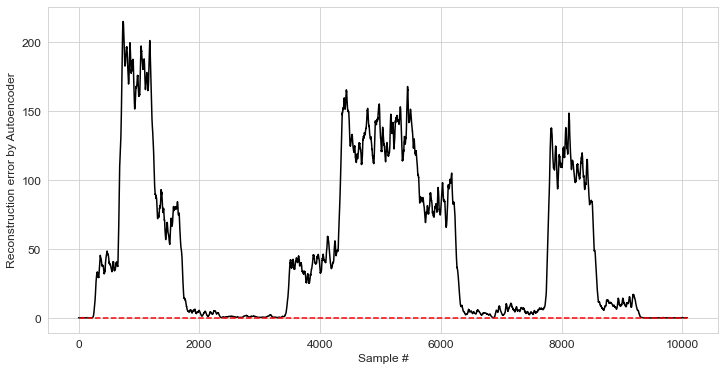

In [36]:
error_ae = autoencoder(df_varyingFeedFlow,AE_CL)

## **Testing the model on abnormal dataset.**

In [37]:
X = ss.transform(df_UAf_decrease)
X_test = pca.transform(X)

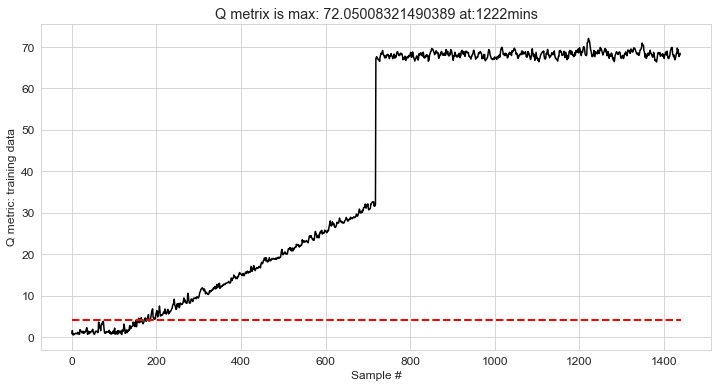

In [38]:
error_pca = Q_test(X,X_test,pca.components_,Q_CL)

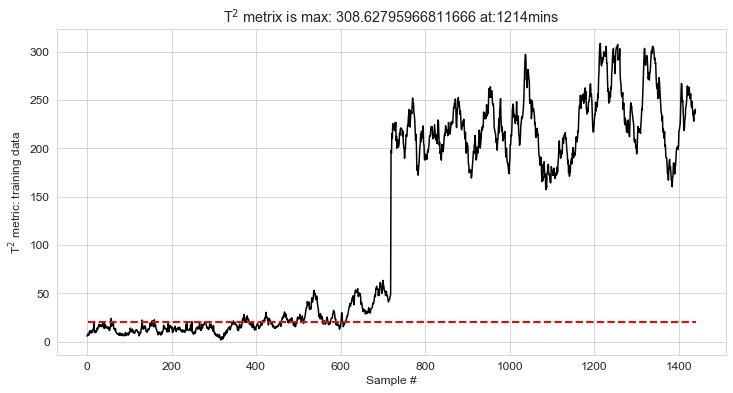

In [39]:
T_test(X_test,pca.explained_variance_,T_CL)

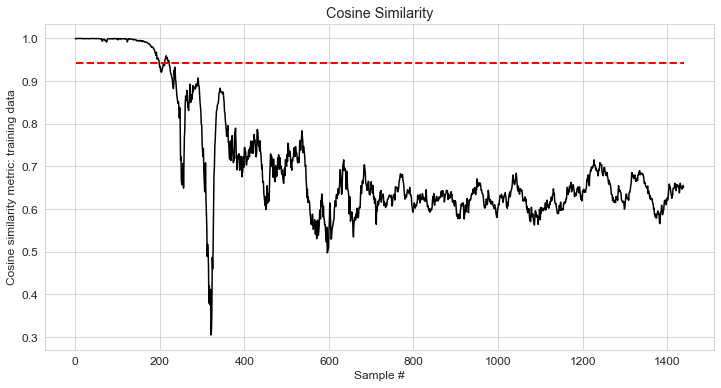

In [40]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

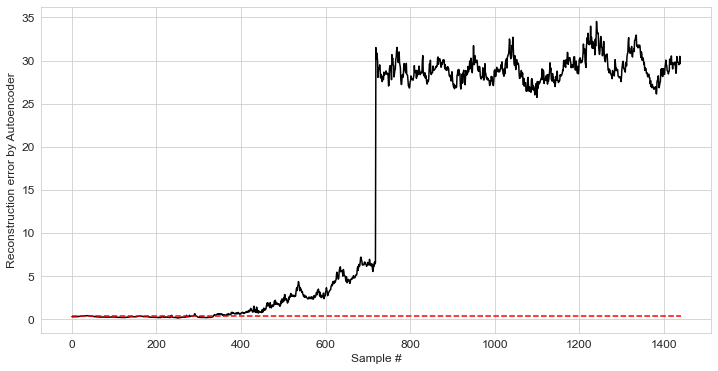

In [41]:
error_ae = autoencoder(df_UAf_decrease,AE_CL)

**Inference**<br>
During steady state operation the errors are within limit but, suddenly the error starts increasing after 700mins.<br>
So, let’s check which parameters are deviating maximum form steady state.<br>
Considering top 10 variables responsible for plant deviation.

## **Visualization**

**Q test Error**

In [42]:
#%% Q contribution
error = np.abs(error_pca).sum(axis=1)
cum = []
for index,value in enumerate(error):
    if (value>Q_CL) and (len(cum)<15):
        previous_val = value
        cum.append(value)
        if len(cum) == 15:
            sample = index
            break
    else:
        cum=[]
# sample = ((pd.Series(error_pca.sum(axis=1))-pd.Series(error_pca.sum(axis=1)).shift()).abs()).argmax()
print('Time-',sample,'mins')
error_test_sample = error_pca[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

Time- 200 mins


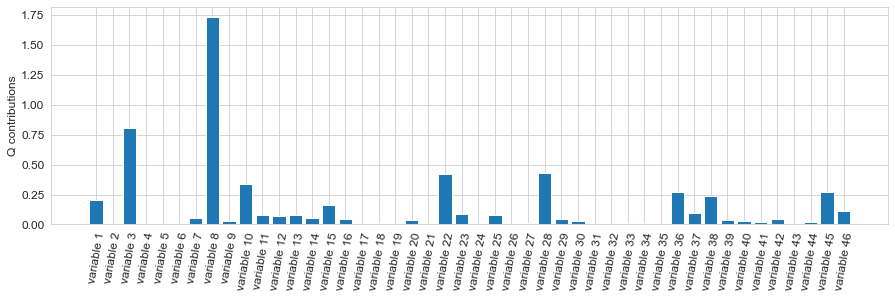

In [43]:
plt.figure(figsize=[15,4])
plt.bar(['variable ' + str((i+1)) for i in range(len(Q_contri))], Q_contri)
plt.xticks(rotation = 80)
plt.ylabel('Q contributions')
plt.show()

Time- 200 mins


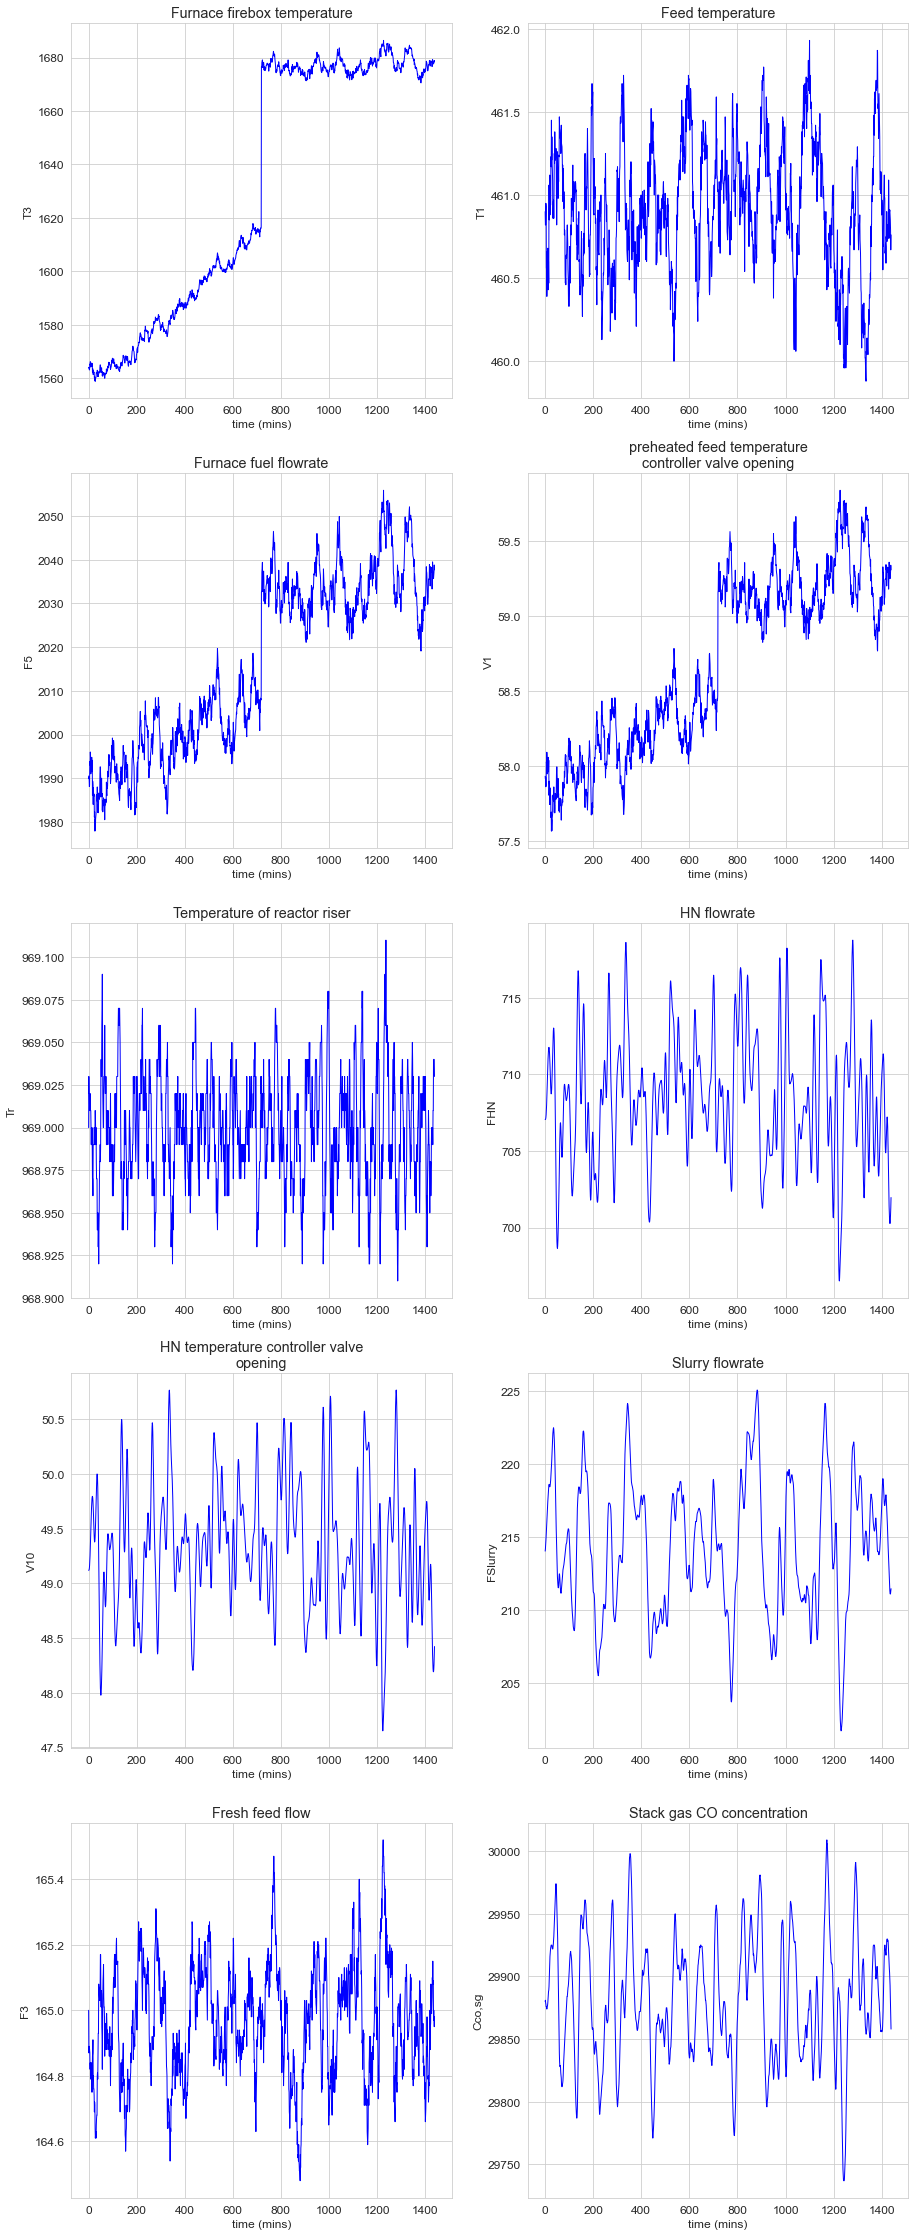

In [44]:
plt.figure(figsize=(15,40))
print('Time-',sample,'mins')
for i,n in enumerate(np.argsort(Q_contri)[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_UAf_decrease.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show

**Autoecoder Error**

In [45]:
#%% Autoencoder Error
error = np.abs(error_ae).sum(axis=1)
cum = []
for index,value in enumerate(error):
    if (value>AE_CL) and (len(cum)<15):
        previous_val = value
        cum.append(value)
        if len(cum) == 15:
            sample = index
            break
    else:
        cum=[]
# sample = ((pd.Series(error_ae.sum(axis=1))-pd.Series(error_ae.sum(axis=1)).shift()).abs()).argmax()
print('Time-',sample,'mins')
error_test_sample = error_pca[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

Time- 349 mins


Time- 349 mins


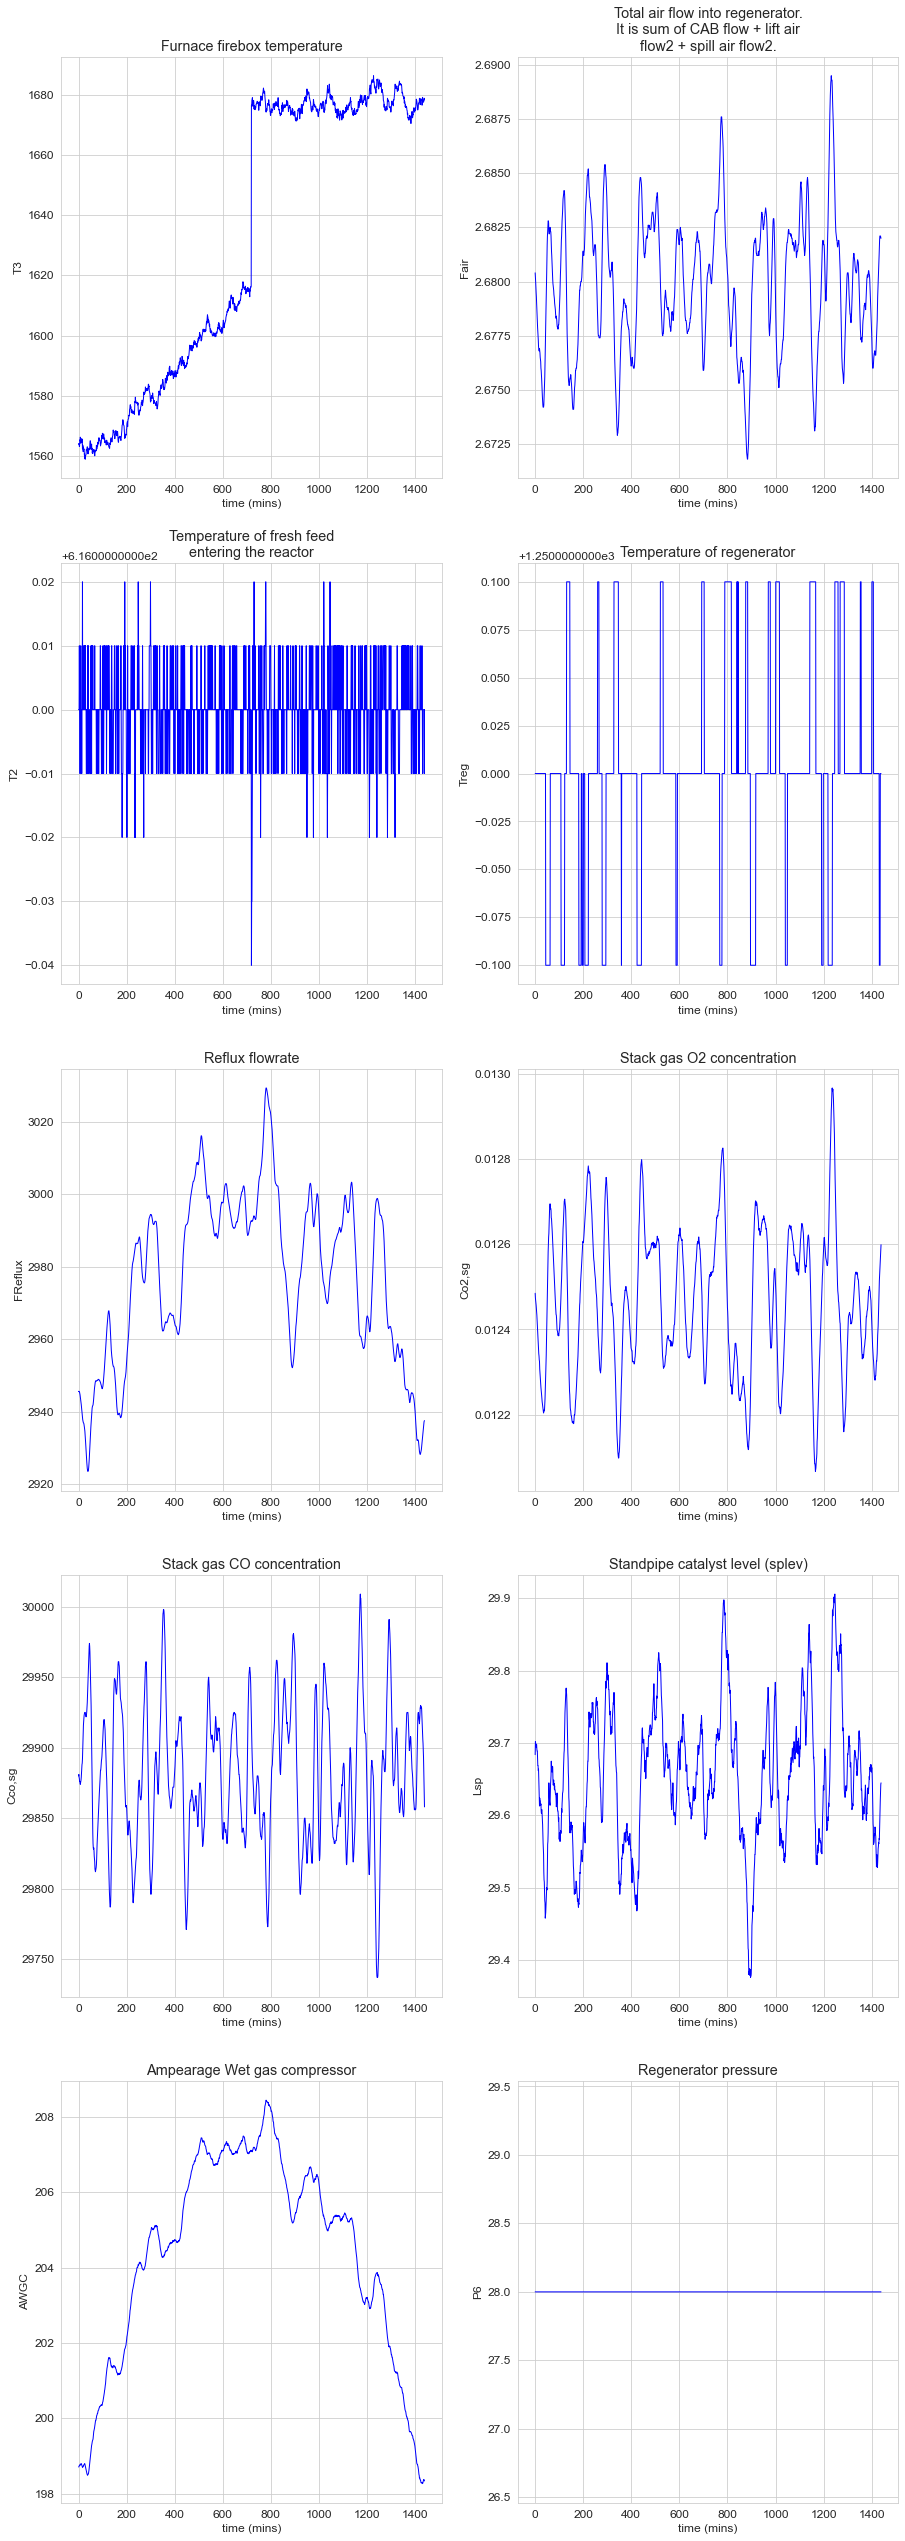

In [46]:
plt.figure(figsize=(15,45))
print('Time-',sample,'mins')
for i,n in enumerate(np.argsort(error_ae[sample])[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_UAf_decrease.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show

# **Conclusion**
It is clearly visible from the plot that furnace box temperature has suddenly increased at 719 mins by 60$^o$C and at the same time Preheating Feed TV opening & Fuel flow rate to furnace has also increased.<br>
All these simultaneous operations indicated that there was a problem occurred in furnace box.<br>
Since the feed flow rate is constant but the fuel flow rate was continuously increasing, it indicated that the fuel requirement is continuously increasing, which means there might be a significant fouling which may occur on tubes.

# **Future Work**

1. Integrate with IoT sensors for real-time anomaly tracking.
2. Develop a predictive maintenance dashboard using Power BI.